# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Project<br><br>DrapeAura 2023 E-Commerce Analysis: Market Basket Analysis By Apriori Algorithm</b></div>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Table of Contents</b></div>

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">
    
- [Introduction](#intro)
- [Research Questions](#Quest)
- [Analysis Objectives](#Objective)
- [Import Libraries](#library)
- [Gathering And Assessing Data](#Gather)
- [Market Basket Analysis](#MBA)
 - [Filtring Data](#Filter)
 - [Data Check](#DataCheck)
 - [Approach to Market Basket Analysis for Strongly Correlated Categories](#Approach)
 - [Market Basket Analysis for Products](#MBA-Prod)
   - [Strong Positive Correlation Categories for Group 1](#StrG1)
   - [Strong Positive Correlation Categories for Group 2](#StrG2)
   - [Moderate Positive Correlation Categories for Group 1](#ModG1)
   - [Moderate Positive Correlation Categories for Group 2](#ModG2)
 - [Market Basket Analysis for Categories](#MBA-Cat)
- [Conclusions & Insights](#Concl)
- [View On Tableau](#Tableau)


<br>

<a id="intro"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Introduction</b></div>

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

- This study builds upon the previous analysis of **DrapeAura's 2023** e-commerce data, which aimed to identify complementary and substitute products through market basket analysis and provide cross-selling recommendations to increase order value. The findings from the earlier project, accessible via this **[link](https://github.com/MohammedElshennawy/DrapeAura_2023_E-Commerce_Analysis/blob/main/DrapeAura%202023%20E-Commerce%20Analysis.ipynb)**, laid a strong foundation for understanding customer purchasing behavior and optimizing sales strategies.


- This time, the stakeholders and company managers have requested a deeper analysis to extract actionable insights that can further enhance the store's performance. Specifically, the focus will be on two key areas:

  1. **Extracting association rules for less common products:** Identifying patterns to promote products that are rarely sold, thereby increasing their visibility and sales.

  2. **Extracting association rules for highly correlated categories:** Redesigning the store layout and product placement based on the most frequently associated categories, leveraging insights from the previous project.


- By incorporating the results from the earlier analysis, this study aims to provide a more comprehensive understanding of customer behavior and product relationships, ultimately driving sales growth and improving the overall shopping experience.

<br>

<a id="Quest"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Research Questions</b></div>

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

- **Based on the objectives of this study, the following research questions will guide the analysis:**
<br>

  - **Less Common Products:**

    - What association rules can be derived to promote products that are rarely sold?

    - How can these products be strategically marketed to increase their sales volume?
    <br>

  - **Highly Correlated Categories:**

    - Which product categories are most frequently associated with each other?

    - How can the store layout and product placement be redesigned to reflect these associations?
    <br>
    
  - **Integration with Previous Findings:**

    - How can the insights from the previous market basket analysis be utilized to enhance the current recommendations?

    - What additional patterns emerge when combining the previous results with the new analysis?

<br>

<a id="Objective"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Analysis Objectives</b></div>

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

- **The primary objectives of this analysis are:**

  1. **Increase Sales of Less Common Products:** Identify patterns and strategies to promote underperforming products and boost their sales.
  <br>

  2. **Optimize Store Layout:** Redesign the store's product placement and categorization based on the most frequently associated categories.
  <br>

  3. **Enhance Customer Experience:** Provide personalized recommendations and improve the overall shopping experience by aligning product offerings with customer preferences.
  <br>

  4. **Leverage Previous Insights:** Integrate findings from the previous project to ensure continuity and build upon established knowledge.
  <br>
  <br>
  
- By addressing these objectives, this study aims to deliver actionable recommendations that align with the company's goals of increasing revenue, improving customer satisfaction, and optimizing operational efficiency.

<br>

<a id="library"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Import Libraries</b></div>

- **For Basic Libraries: Importing Essential Libraries for Data Processing and Visualization.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")
pd.options.display.max_columns = 30

<br>

- **For Market Basket Analysis Libraries: Importing Libraries for Association Rules and Frequent Pattern Mining**

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

<a id="Gather"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Gathering And Assessing Data</b></div>

- **Loading the `us_product_sales_23` dataset for 2023.**

In [3]:
df = pd.read_csv("us_product_sales_23.csv")

df.head()

order_item_id  invoice_no  product_id  \
0         142771       98298       13928   
1         142772       98298        5803   
2         142774       98298       10182   
3         142776       98299       12882   
4         142775       98299       15918   

                                 product_description        category  \
0  Low Profile Dyed Cotton Twill Cap - Putty W39S55D     Accessories   
1  LOCOMO Women Patriot Patriotic Great Britain B...        Leggings   
2              Floral Flannel Pajamas - Misses Sizes  Sleep & Lounge   
3  Speedo Women's Color Block Zip Front Endurance...            Swim   
4  Glamorise Women's Soft Shoulders Minimizer Bra...            Plus   

                brand department           transaction_date   cost  \
0                  MG      Women  2023-11-19 09:52:00+00:00   2.34   
1     LOCOMO Leggings      Women  2023-11-19 09:52:00+00:00   8.74   
2  Carol Wright Gifts      Women  2023-11-19 09:52:00+00:00  10.08   
3              Speedo      Women  2023-11-30 09:52:00+00:00  35.04   
4           Glamorise      Women  2023-11-30 09:52:00+00:00  22.81   

   shipping_cost_1000_mile  unit_price  quantity   sales  customer_id  age  \
0                     0.19        5.95         4   23.80        78444   39   
1                     0.81       14.99         3   44.97        78444   39   
2                     0.82       16.99         2   33.98        78444   39   
3                     3.26       79.99         5  399.95        78444   39   
4                     1.97       45.99         4  183.96        78444   39   

  gender  postal_code    city        state state_ab region  customer_latitude  \
0      F        38655  Oxford  Mississippi       MS  South          34.329453   
1      F        38655  Oxford  Mississippi       MS  South          34.329453   
2      F        38655  Oxford  Mississippi       MS  South          34.329453   
3      F        38655  Oxford  Mississippi       MS  South          34.329453   
4      F        38655  Oxford  Mississippi       MS  South          34.329453   

   customer_longitude  state_latitude  state_longitude  
0          -89.468527       32.741646       -89.678696  
1          -89.468527       32.741646       -89.678696  
2          -89.468527       32.741646       -89.678696  
3          -89.468527       32.741646       -89.678696  
4          -89.468527       32.741646       -89.678696

<br>

- **Check the basic information of the data frame.**

In [4]:
df.shape

(18819, 25)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18819 entries, 0 to 18818
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_item_id            18819 non-null  int64  
 1   invoice_no               18819 non-null  int64  
 2   product_id               18819 non-null  int64  
 3   product_description      18819 non-null  object 
 4   category                 18819 non-null  object 
 5   brand                    18819 non-null  object 
 6   department               18819 non-null  object 
 7   transaction_date         18819 non-null  object 
 8   cost                     18819 non-null  float64
 9   shipping_cost_1000_mile  18819 non-null  float64
 10  unit_price               18819 non-null  float64
 11  quantity                 18819 non-null  int64  
 12  sales                    18819 non-null  float64
 13  customer_id              18819 non-null  int64  
 14  age                   

&#9865; **There are no Null values, duplicate columns or rows, and the column data types are compatible.**<br><br>

=======================================================================================================================

<a id="MBA"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Market Basket Analysis</b></div>

<a id="Filter"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Filtring Data</b></div>

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

- To perform market basket analysis, I will filter the dataset to include only the columns most relevant to this purpose. 
- The original dataset contained numerous columns, such as customer demographics, transaction details, and geographical information. However, for market basket analysis, the focus is on transactional data and product information. 
- Therefore, the dataset was narrowed down to the following key columns: `invoice_no`, `product_id`, `product_description`, and `category`. 
- These columns are essential for identifying patterns, such as frequently co-purchased products, and for generating association rules that reveal insights into customer purchasing behavior.

- **Limit the dataset to the columns most relevant to market basket analysis.**

In [7]:
df_market = df[df.columns[1:5]]

df_market.head()

invoice_no  product_id                                product_description  \
0       98298       13928  Low Profile Dyed Cotton Twill Cap - Putty W39S55D   
1       98298        5803  LOCOMO Women Patriot Patriotic Great Britain B...   
2       98298       10182              Floral Flannel Pajamas - Misses Sizes   
3       98299       12882  Speedo Women's Color Block Zip Front Endurance...   
4       98299       15918  Glamorise Women's Soft Shoulders Minimizer Bra...   

         category  
0     Accessories  
1        Leggings  
2  Sleep & Lounge  
3            Swim  
4            Plus

<a id="DataCheck"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Data Check</b></div>

- **Number of products.**

In [8]:
df_market.product_description.nunique()

13308

<br>

- **Number of categories.**

In [9]:
df_market.category.nunique()

26

<br>

- **Number of products in each category.**

In [10]:
df_market.groupby(by="category")["product_description"].nunique().sort_values(ascending=False)

category
Intimates                        1041
Jeans                             899
Fashion Hoodies & Sweatshirts     893
Tops & Tees                       879
Swim                              836
Shorts                            829
Sweaters                          827
Sleep & Lounge                    806
Accessories                       723
Active                            709
Outerwear & Coats                 677
Underwear                         542
Pants                             518
Socks                             459
Dresses                           445
Maternity                         381
Suits & Sport Coats               370
Plus                              332
Socks & Hosiery                   305
Leggings                          273
Pants & Capris                    266
Blazers & Jackets                 238
Skirts                            155
Suits                              88
Jumpsuits & Rompers                78
Clothing Sets                      13
Nam

<a id="Approach"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Approach to Market Basket Analysis for Strongly Correlated Categories</b></div>

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

- In the current project, we conduct a market basket analysis focusing on products in categories that have shown strong and moderate positive associations in a previous analysis. 
- Given the large number of products, applying the Apriori algorithm to the entire dataset at once would be computationally intensive, time-consuming, and potentially memory-prohibitive, risking processing failure. 
- To address this, we will strategically segment the products into smaller, more manageable groups based on the correlation insights from the prior project.


1. **Grouping Products with Strong Positive Correlations:**
- We will segment the categories with strong positive associations into two groups:
  - Group 1: Intimates, Clothing Sets, Outerwear & Coats
  - Group 2: Suits, Plus, Jumpsuits & Rompers, Sleep & Lounge

2. **Grouping Products with Moderate Positive Correlations:**
- Similarly, we will segment the categories with moderate positive associations into two groups:
  - Group 1: Active, Maternity, Leggings, Socks & Hosiery
  - Group 2: Jeans, Accessories, Socks

<br>

**Handling Categories:**
- Since the total number of categories is relatively small (not exceeding 26), no further subdivision is required. 
- These categories can be processed efficiently in a single batch without the need for trimming.

<br>

**This structured approach ensures efficient processing, reduces computational overhead, and allows for meaningful extraction of association rules to inform cross-selling recommendations.**

<a id="MBA-Prod"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Market Basket Analysis for Products </b></div>

<a id="StrG1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Strong Positive Correlation Categories for Group 1:<br><br>"Intimates, Clothing Sets, Outerwear & Coats"</b></div>

- **Filter data on columns for group 1.**

In [11]:
categories1 = ["Intimates", "Clothing Sets", "Outerwear & Coats"]

df_market_prod_cat1 = df_market[df_market["category"].isin(categories1)]

df_market_prod_cat1

invoice_no  product_id  \
10         124359       24214   
21           7053       12660   
39          56346       11963   
41          56345       12106   
42          56347        8326   
...           ...         ...   
18803       90646       11041   
18804       10716       10612   
18808       41649       12522   
18809       41649       11788   
18816       13533       24329   

                                     product_description           category  
10               Marc Ecko Cut & Sew Men's Bobber Jacket  Outerwear & Coats  
21                                  Bra Extenders 4-pack          Intimates  
39     Fashion High Quality Chemise Thong Included Se...          Intimates  
41        Rago Pink/Black Trim Open Bottom Shaper (8355)          Intimates  
42     Via Spiga Women's Sondria Elegant Hooded Down ...  Outerwear & Coats  
...                                                  ...                ...  
18803     Smartwool Women's Microweight Bikini Underwear          Intimates  
18804  Vanity Fair Women's Plus-Size Back Smoothing F...          Intimates  
18808  Braza Silicone Dolly Super Wedge Push Up Bra I...          Intimates  
18809  Hanky Panky Leopard Nouveau Unlined Cami (4X4571)          Intimates  
18816                         Oakley Men's Can Do Jacket  Outerwear & Coats  

[2382 rows x 4 columns]

<br>

- **Number of products in group 1.**

In [12]:
df_market_prod_cat1.product_description.nunique()

1731

<br>

- **To perform the pruning process, we will create a function to prepare transaction data for market basket analysis by converting invoices into transactions using One-Hot Encoding, then applying the Apriori algorithm to extract frequent items and analyze product associations based on a defined support threshold.**

In [13]:
def prep_trans_prune(data, items_col, Min_support=0.00001, Max_len=2):
    """
    Prepares transaction data, applies one-hot encoding, and extracts frequent itemsets using the Apriori algorithm.

    Parameters:
    - data: DataFrame containing transaction data.
    - items_col: Column name representing the items in the transactions.
    - Min_support: Minimum support threshold for frequent itemsets (default: 0.00001).
    - Max_len: Maximum length of itemsets to be considered (default: 2).

    Returns:
    - frequent_item: DataFrame containing frequent itemsets and their support values.
    """
    
    # Extract unique invoice numbers
    invoice_no = data["invoice_no"].unique()
    
    # Group items by invoice number and create a list of transactions
    items = [list(data[data["invoice_no"] == i][items_col]) for i in invoice_no]
    
    # Initialize TransactionEncoder to transform transaction data into a one-hot encoded format
    encoder = TransactionEncoder()
    
    # Fit and transform the transaction data into a one-hot encoded DataFrame
    onehot = encoder.fit(items).transform(items)
    onehot = pd.DataFrame(onehot, columns=encoder.columns_)
    
    # Apply the Apriori algorithm to extract frequent itemsets
    frequent_item = apriori(onehot, min_support=Min_support, use_colnames=True, max_len=Max_len)
    
    # Return the DataFrame of frequent itemsets
    return frequent_item


<br>

- **Apply pruning to product_description items, using a minimum of 0.0004 as a support threshold limit for frequent itemsets.**

In [14]:
freq_item_prod_cat1 = prep_trans_prune(data = df_market_prod_cat1, items_col = "product_description", Min_support = 0.0004)
freq_item_prod_cat1

support                                           itemsets
0     0.000452  ((CH133NL) A Medium Full Bridal Petticoat Crin...
1     0.000452  (100% Silk Camisole Angelina Jolie's Favorite ...
2     0.001808                         (10pk Cotton White Hi-Cut)
3     0.000452  (2 PC. Ladies Lace Babydoll Set - One Size - B...
4     0.000904  (2 PC. Ladies Stretch Lace Camisole Set - One ...
...        ...                                                ...
1910  0.000452  (Shadowline 38 inch Flare Half Slip (47116), b...
1911  0.000452  (Tri-Mountain Womens 95% Polyester 5% Nylon Wo...
1912  0.000452  (Vanity Fair Women's Lollipop Leg Band Brief 3...
1913  0.000452  (Volcom Juniors Park It Parka, Vanity Fair Wom...
1914  0.000452  (Wacoal Women's Everyday Full Figure Softcup B...

[1915 rows x 2 columns]

<br>

- **To extract association rules for repeated items, we will create a function to generate association rules from frequent itemsets and applies formatting to improve readability.**

In [15]:
def analyze_associations(frequent_itemsets, Metric="support", Min_threshold=0.0):
    """
    Generates association rules from frequent itemsets and applies formatting for better readability.

    Parameters:
    - frequent_itemsets: DataFrame containing frequent itemsets and their support values.
    - Metric: The metric to evaluate the association rules (default: "support").
    - Min_threshold: The minimum threshold for the chosen metric to filter rules (default: 0.0).

    Returns:
    - rules_table: DataFrame containing the generated association rules.
    - highlighted_table: Styled DataFrame with color gradients for better visualization.
    """

    # Generate association rules based on the specified metric and threshold
    rules_table = association_rules(frequent_itemsets, metric=Metric, min_threshold=Min_threshold)

    # Extract single items from antecedents and consequents for readability
    rules_table["antecedents"] = rules_table["antecedents"].apply(lambda antecedent: list(antecedent)[0])
    rules_table["consequents"] = rules_table["consequents"].apply(lambda consequent: list(consequent)[0])

    # Create a copy of the rules table for modifications
    normalized_data = rules_table.copy()

    # Replace infinite values in the conviction column with a large number (1e6) to avoid display issues
    normalized_data["conviction"] = normalized_data["conviction"].replace([np.inf, -np.inf], 1e6)

    # Apply a background gradient to enhance readability of the table
    highlighted_table = normalized_data.style.background_gradient(cmap="YlGn")

    # Format the conviction values: display "inf" for large numbers, otherwise show six decimal places
    highlighted_table = highlighted_table.format({"conviction": lambda x: "inf" if x == 1e6 else f"{x:.6f}"})

    # Return the raw association rules table and the formatted version for display
    return rules_table, highlighted_table


<br>

- ِ**Apply association rules table and the formatted version for display.**

In [16]:
rules_prod_cat1, highlighted_prod_cat1 = analyze_associations(freq_item_prod_cat1)

highlighted_prod_cat1

<br>

- **We will create a function that generates two scatter plots to visualize association rule metrics. The first plot compares Antecedent Support and Consequent Support, while the second shows Support vs. Confidence, with Lift represented by point size. This helps assess general trends in rule behavior for many antecedents and consequentd, but without isolating any rule in particular.**


In [17]:
def rules_scatterplot(data_rules):
    
    """
    Generates scatter plots to visualize association rule metrics.

    Parameters:
    - data_rules: DataFrame containing association rules with support, confidence, and lift values.

    Returns:
    - Displays two scatter plots:
      1. Antecedent Support vs Consequent Support (size represents lift).
      2. Support vs Confidence (size represents lift).
    """

    # Create a figure with two subplots arranged in one row and two columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))  

    # First scatter plot: Antecedent Support vs Consequent Support
    sns.scatterplot(data=data_rules, x="antecedent support", y="consequent support", 
                    size="lift", sizes=(20, 200), ax=axes[0])  # Size of points varies based on 'lift'

    # Set the title and axis labels for the first plot
    axes[0].set_title('Antecedent Support vs Consequent Support (Size by Lift)', fontsize=16, color="k", pad=20)
    axes[0].set_xlabel('Antecedent Support', fontsize=14)
    axes[0].set_ylabel('Consequent Support', fontsize=14)

    # Adjust tick label size for better readability
    axes[0].tick_params(axis='x', labelsize=12)  
    axes[0].tick_params(axis='y', labelsize=12)

    # Second scatter plot: Support vs Confidence
    sns.scatterplot(data=data_rules, x="support", y="confidence", 
                    size="lift", sizes=(20, 200), ax=axes[1])  # Size of points varies based on 'lift'

    # Set the title and axis labels for the second plot
    axes[1].set_title('Support vs Confidence (Size by Lift)', fontsize=16, color="k", pad=20)
    axes[1].set_xlabel('Support', fontsize=14)
    axes[1].set_ylabel('Confidence', fontsize=14)

    # Adjust tick label size for better readability
    axes[1].tick_params(axis='x', labelsize=12)  
    axes[1].tick_params(axis='y', labelsize=12);


<br>

- **Apply scatter plots to visualize association rule metrics.**

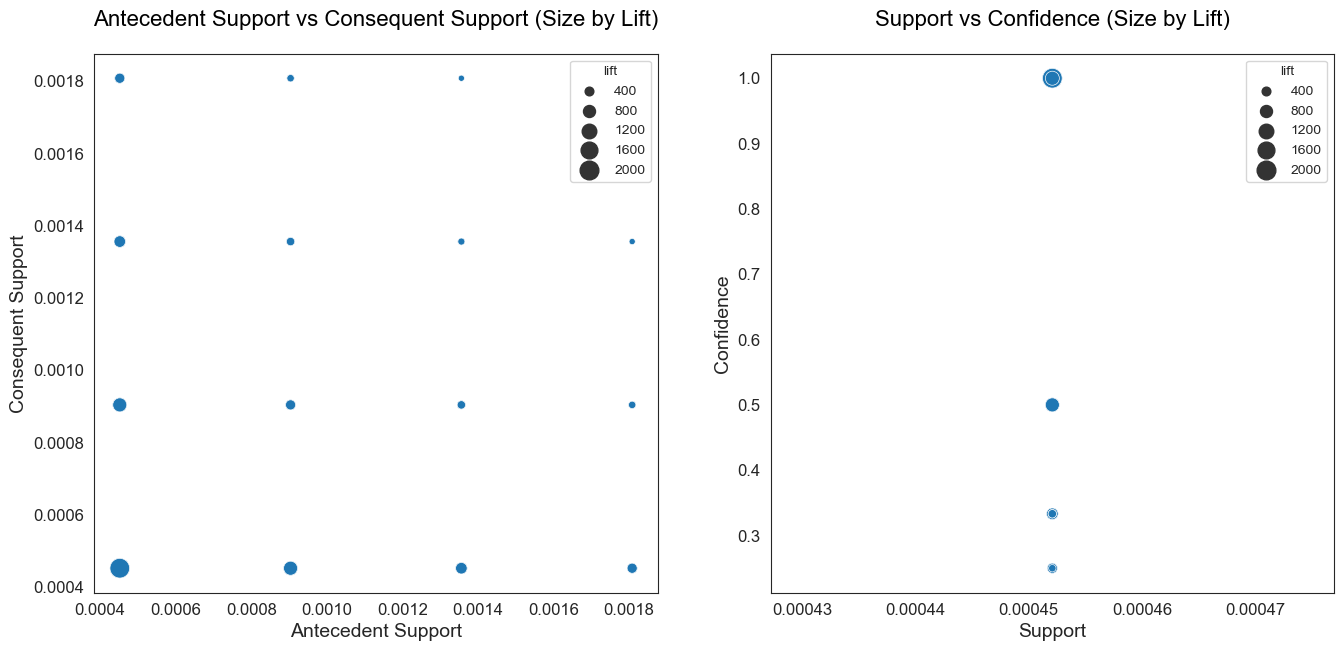

In [18]:
rules_scatterplot(rules_prod_cat1)

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Key Insights from Antecedent-Consequent Support Plots:

#### Support Distribution:

- Most rules exhibit relatively low antecedent and consequent support, indicating rare item relationships.

- A dense cluster of rules at low support values suggests limited frequent co-occurrence, with few exceptions at higher support.

1. **Lift Impact:**

- High-lift rules (large points) are typically rare (low support) but represent strong, actionable associations for targeted campaigns.

- These rules highlight niche product relationships with exceptional synergies.

2. **Antecedent-Consequent Asymmetry:**

- Disparities between antecedent and consequent support imply that some products in antecedents are more/less common than those in consequents.

3. **Leveraging Rare Rules:**

- High-lift, low-support rules may identify unique opportunities for promoting less common products (e.g., limited-time offers).

<br>

### Key Insights from Support-Confidence Plots:

#### Support-Confidence Relationship:

- Low-support rules span a wide confidence range, suggesting rare relationships can be either strong (high confidence) or weak (low confidence).

- High-support rules generally show low-to-moderate confidence, indicating common item pairs may lack strong interdependence.

1. **Lift Patterns:**

- High-lift rules (large points) cluster at low support and high confidence, reflecting rare but robust associations.

- Low-lift rules (small points) are dispersed, making them less actionable for targeted strategies.

2. **Strategic Focus:**

- Low-support, high-confidence rules: Ideal for hyper-targeted cross-selling (e.g., personalized promotions).

- Moderate-support, high-confidence rules: Suitable for broad marketing strategies due to their balance of strength and recurrence.

<br>

**Why Retain Low-Support Rules?**
- High Confidence: Rare rules with high confidence imply near-certainty in the antecedent-consequent relationship (e.g., “If A is bought, B is almost always bought”).

- High Lift: These rules reveal exceptional associations outperforming random chance, even if infrequent.

- Niche Markets: Low-support rules may target specialized or high-margin segments.


### Recommendations for Rule Filtering:

- Multi-metric filtering: Prioritize rules with high lift (> 700), confidence (> 50%), or conviction, while treating support as a secondary criterion.

- Context-driven thresholds: Adjust thresholds based on business goals (e.g., retain niche rules for premium campaigns)

<br>

- **We will filter association rules to identify actionable patterns for promoting less common products (rarely sold items) by retaining rules that meet the following criteria:**

1. Antecedent Support ≥ 0.001 (common starting products).

2. Consequent Support < 0.0005 (rare target products).

3. Lift ≥ 700 (exceptionally strong association).

- **This approach isolates rules where frequently purchased items (antecedents) are strongly linked to niche products (consequents), enabling targeted campaigns to boost sales of underperforming items."**

In [19]:
pruned_rules1 = rules_prod_cat1[
    (rules_prod_cat1['antecedent support'] >= 0.001) &
    (rules_prod_cat1['consequent support'] < 0.0005) &
    (rules_prod_cat1['lift'] >= 700)
].reset_index(drop=True)

pruned_rules1

antecedents  \
0   Laundry Women's Windbreaker Down Coat with Ano...   
1          Angelina High-waisted Girdle Shaper Briefs   
2                    Arc'teryx Women's Beta AR Jacket   
3                   Arc'teryx Women's Stingray Jacket   
4   Authentic Steel Boned Waist Reducing Classic B...   
5     Bali Women's Double Support Wire-Free Bra #3820   
6   Bali Women's Smooth It Out Cami With Bali Conc...   
7   Ilusion Women's Microfiber Low-rise Boy Short ...   
8   Braza Silicone Dolly Super Wedge Push Up Bra I...   
9       Butt Enhancing Boy-short Panty 203 By Vedette   
10  Calvin Klein Women's Double Breasted Babydoll ...   
11  London Fog Men's Durham Single-Breasted Fly-Fr...   
12  RVCA Men's Puffer Chambray Long Sleeve Hooded ...   
13             Olga Women's Luxury Lift Minimizer Bra   
14                   Marmot Super Mica Jacket - Men's   
15  Devon & Jones Men's Classic Reversible Jacket ...   
16       Underwire Cup Babydoll Set with Garter-Black   
17                  Hanro Women's Pure Affair Chemise   
18  Set: Cheetah Bra and Thong Set with 6 Hook Bra...   
19  Heavenly Shapewear Women's Seamless Long Leg S...   
20  Hilary Radley Women's Zip-Front Down Jacket Wi...   
21  MO7 Most Official Seven Men's Wool Varsity Jac...   
22             Olga Women's Luxury Lift Minimizer Bra   
23  Only Hearts Women's Second Skin 16 Inch Half S...   

                                          consequents  antecedent support  \
0          2 or 4 PACK: Seamless Removable Strap Bras            0.001356   
1                    Calvin Klein Women's Houndstooth            0.001356   
2   Comfort Choice Plus Size Bra cotton everyday w...            0.001356   
3   David's Bridal Very Full Bridal Ball Gown Slip...            0.001356   
4                      Sexy One-piece Bikini Set-Pink            0.001356   
5              Cosabella Women's Ever 2 Tone Babydoll            0.001356   
6       Volcom Juniors Enemy Lines Windbreaker Jacket            0.001356   
7    Barely There Microfiber Diamond Camisole Black S            0.001356   
8   Hanky Panky Leopard Nouveau Unlined Cami (4X4571)            0.001356   
9         Lace Cami Top and Boxer Shorts Lingerie Set            0.001356   
10  Only Hearts So Fine With Lace Cropped Cami Bra...            0.001356   
11  Carhartt Men's Sandstone Detroit Jacket - Blan...            0.001356   
12                      Carhartt Men's Work-Flex Coat            0.001356   
13          Carnival Womens Backless Tux Longline Bra            0.001356   
14  Chestnut Hill Men's Polartec Full Zip Fleece J...            0.001356   
15                Columbia Men's Killick Storm Jacket            0.001356   
16               Cosabella Women's Bellissima Hotpant            0.001356   
17      Fruit Of The Loom Womens 10 Pack Cotton Brief            0.001356   
18  Hanes Women's Cotton Briefs Pastel Assorted 6 ...            0.001356   
19                      Lady Romance Cotton Half Slip            0.001356   
20  Ilusion Women's PLUS SIZE Antistatic Vintage-s...            0.001356   
21             True Religion Men's Jimmy Super Jacket            0.001356   
22    Pure Style Girlfriends Women's Gather-The-Girls            0.001356   
23                          prAna Women's Tori Jacket            0.001356   

    consequent support   support  confidence        lift  leverage  \
0             0.000452  0.000452    0.333333  737.333333  0.000451   
1             0.000452  0.000452    0.333333  737.333333  0.000451   
2             0.000452  0.000452    0.333333  737.333333  0.000451   
3             0.000452  0.000452    0.333333  737.333333  0.000451   
4             0.000452  0.000452    0.333333  737.333333  0.000451   
5             0.000452  0.000452    0.333333  737.333333  0.000451   
6             0.000452  0.000452    0.333333  737.333333  0.000451   
7             0.000452  0.000452    0.333333  737.333333  0.000451   
8             0.000452  0.000452    0.333333  737.333333  0.

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Results of Applying the association rules filter to the Dataset:

1. **Uniform High Lift Values:**
- All rules exhibit an exceptionally strong association (lift ≈ 737), indicating that purchasing the antecedent product (trigger) nearly guarantees the purchase of the consequent product (target). 
- This suggests niche but highly strategic cross-selling opportunities.

2. **Low Support Patterns:**

- Antecedent Support = 0.001356: The trigger products are relatively common.
- Consequent Support = 0.000452: The target products are even rarer.
- This implies these rules represent rare but impactful relationships (e.g., specialty or seasonal items).

<br>

- **We will create a function that visualizes product association rules using parallel coordinates. The function simplifies the dataset to display only antecedents (trigger products) and consequents (target products), then plots their relationships. This visualization highlights frequent product pairs, enabling quick identification of cross-selling opportunities without relying on technical metrics.**

In [20]:
def parallel_coord_rules(data, name_items, Colormap="viridis", figsize=(5, 10)):
    """
    Visualizes product associations using parallel coordinates.
    
    Parameters:
    - data: DataFrame containing association rules (antecedents, consequents).
    - name_items: Name of the product category/group for plot labeling.
    - Colormap: Color scheme for the plot (default: "viridis").
    - figsize: Plot dimensions (default: (5, 10)).
    
    Returns:
    - coord: DataFrame with selected columns for antecedents, consequents, and rule index.
    """
    
    # Create a "rule" column to uniquely identify each association rule
    data["rule"] = data.index
    
    # Extract relevant columns for visualization
    coord = data[["antecedents", "consequents", "rule"]]
    
    # Initialize the plot with specified size
    plt.figure(figsize=figsize)
    
    # Generate parallel coordinates plot to visualize relationships
    parallel_coordinates(coord, 'rule', colormap=Colormap)
    
    # Customize plot title and labels
    plt.title(f'Market Basket: {name_items} Associations', fontsize=14, color="k", pad=20)
    plt.ylabel(name_items, fontsize=14)
    
    # Remove legend for cleaner visualization
    plt.legend([])
    
    return coord

<br>

- **Apply parallel coordinates to visualizes product association rules.**

antecedents  \
0   Laundry Women's Windbreaker Down Coat with Ano...   
1          Angelina High-waisted Girdle Shaper Briefs   
2                    Arc'teryx Women's Beta AR Jacket   
3                   Arc'teryx Women's Stingray Jacket   
4   Authentic Steel Boned Waist Reducing Classic B...   
5     Bali Women's Double Support Wire-Free Bra #3820   
6   Bali Women's Smooth It Out Cami With Bali Conc...   
7   Ilusion Women's Microfiber Low-rise Boy Short ...   
8   Braza Silicone Dolly Super Wedge Push Up Bra I...   
9       Butt Enhancing Boy-short Panty 203 By Vedette   
10  Calvin Klein Women's Double Breasted Babydoll ...   
11  London Fog Men's Durham Single-Breasted Fly-Fr...   
12  RVCA Men's Puffer Chambray Long Sleeve Hooded ...   
13             Olga Women's Luxury Lift Minimizer Bra   
14                   Marmot Super Mica Jacket - Men's   
15  Devon & Jones Men's Classic Reversible Jacket ...   
16       Underwire Cup Babydoll Set with Garter-Black   
17                  Hanro Women's Pure Affair Chemise   
18  Set: Cheetah Bra and Thong Set with 6 Hook Bra...   
19  Heavenly Shapewear Women's Seamless Long Leg S...   
20  Hilary Radley Women's Zip-Front Down Jacket Wi...   
21  MO7 Most Official Seven Men's Wool Varsity Jac...   
22             Olga Women's Luxury Lift Minimizer Bra   
23  Only Hearts Women's Second Skin 16 Inch Half S...   

                                          consequents  rule  
0          2 or 4 PACK: Seamless Removable Strap Bras     0  
1                    Calvin Klein Women's Houndstooth     1  
2   Comfort Choice Plus Size Bra cotton everyday w...     2  
3   David's Bridal Very Full Bridal Ball Gown Slip...     3  
4                      Sexy One-piece Bikini Set-Pink     4  
5              Cosabella Women's Ever 2 Tone Babydoll     5  
6       Volcom Juniors Enemy Lines Windbreaker Jacket     6  
7    Barely There Microfiber Diamond Camisole Black S     7  
8   Hanky Panky Leopard Nouveau Unlined Cami (4X4571)     8  
9         Lace Cami Top and Boxer Shorts Lingerie Set     9  
10  Only Hearts So Fine With Lace Cropped Cami Bra...    10  
11  Carhartt Men's Sandstone Detroit Jacket - Blan...    11  
12                      Carhartt Men's Work-Flex Coat    12  
13          Carnival Womens Backless Tux Longline Bra    13  
14  Chestnut Hill Men's Polartec Full Zip Fleece J...    14  
15                Columbia Men's Killick Storm Jacket    15  
16               Cosabella Women's Bellissima Hotpant    16  
17      Fruit Of The Loom Womens 10 Pack Cotton Brief    17  
18  Hanes Women's Cotton Briefs Pastel Assorted 6 ...    18  
19                      Lady Romance Cotton Half Slip    19  
20  Ilusion Women's PLUS SIZE Antistatic Vintage-s...    20  
21             True Religion Men's Jimmy Super Jacket    21  
22    Pure Style Girlfriends Women's Gather-The-Girls    22  
23                          prAna Women's Tori Jacket    23

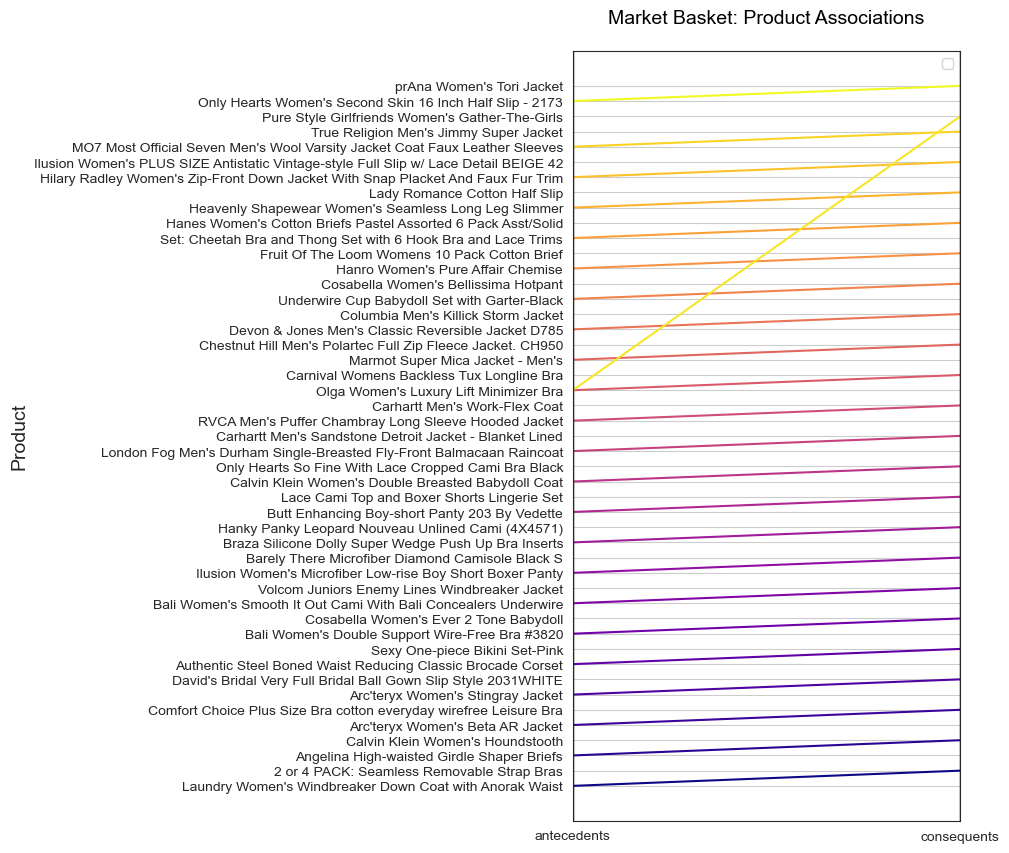

In [21]:
parallel_coord_rules(pruned_rules1, name_items = "Product", Colormap="plasma")

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">
    
### Visualization Insights (Parallel Coordinates Plot):

- The parallel coordinates plot will show distinct lines connecting antecedents and consequents, highlighting specific product pairs like:

- Outerwear → Specialty Undergarments (e.g., "Arc'teryx Women’s Beta AR Jacket" → "Comfort Choice Plus Size Bra").

- Shapewear → Lingerie (e.g., "Authentic Steel Boned Corset" → "Sexy One-piece Bikini Set").


- **Actionable Recommendations:**

  - **Targeted Campaigns:** Use antecedent products for women (e.g., premium jackets) to promote rare consequents (e.g., specialized bras) via bundled offers.

  - **Niche Marketing:** Leverage these rules for high-margin, low-volume products (e.g., bridal wear or luxury lingerie).

  - **Parameter Adjustment:** Consider relaxing support thresholds to explore more frequent (but weaker) associations if broader campaigns are needed.


- **Key Takeaway:**

  - The visualization confirms rare but statistically significant product relationships, ideal for hyper-targeted marketing. 

  - However, the low support values suggest these rules may not drive volume sales, making them better suited for premium or seasonal strategies.

<a id="StrG2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Strong Positive Correlation Categories for Group 2:<br><br>"Suits, Plus, Jumpsuits & Rompers, Sleep & Lounge"</b></div>

- **Filter data on columns for group 2.**

In [22]:
categories2 = ["Suits", "Plus", "Jumpsuits & Rompers", "Sleep & Lounge"]

df_market_prod_cat2 = df_market[df_market["category"].isin(categories2)]

df_market_prod_cat2

invoice_no  product_id  \
2           98298       10182   
4           98299       15918   
5           98299        4159   
22           7052        8172   
37          89596       26490   
...           ...         ...   
18766      125127       10182   
18769       31489       15833   
18770       10696       26994   
18788       78255       27304   
18790      123791        9800   

                                     product_description             category  
2                  Floral Flannel Pajamas - Misses Sizes       Sleep & Lounge  
4      Glamorise Women's Soft Shoulders Minimizer Bra...                 Plus  
5      e.vil French Terry Jumper Embellished with cry...  Jumpsuits & Rompers  
22      Plus Suede Two Piece Floral Embroidered Pant Set                Suits  
37     Majestic International Men's 2 Piece Woven Paj...       Sleep & Lounge  
...                                                  ...                  ...  
18766              Floral Flannel Pajamas - Misses Sizes       Sleep & Lounge  
18769  Flexees Women's FlexeesÂ® Take Inches Off? Wea...                 Plus  
18770                          HUGO BOSS Men's Long Pant       Sleep & Lounge  
18788                          Mens Striped Pajama Pants       Sleep & Lounge  
18790            Kashwere Adult Shawl Collared Pink Robe       Sleep & Lounge  

[1779 rows x 4 columns]

<br>

- **Number of products in group 2.**

In [23]:
df_market_prod_cat2.product_description.nunique()

1302

<br>

- **Apply pruning to product_description items, using a minimum of 0.0005 as a support threshold limit for frequent itemsets.**

In [24]:
freq_item_prod_cat2 = prep_trans_prune(data = df_market_prod_cat2, items_col = "product_description", Min_support = 0.0005)
freq_item_prod_cat2

support                                           itemsets
0     0.000589  ((6240) Dip Hemmed Flute Skirt Suit Pinstripe ...
1     0.000589  ((6249-3) Teddy Style Function Suit with Penci...
2     0.001179  ((6251) Smart Casual Tailored Trouser Suit Dar...
3     0.000589       (100% Cotton Flannel Pajamas - Misses Sizes)
4     0.000589  (12-Pairs Assorted Designs Ankle/Trainer Socks...
...        ...                                                ...
1380  0.000589  (Pure Cashmere Men and Women Solid Scarf, Ray-...
1381  0.000589  (Ray-Ban Meteor Wayfarer Sunglasses, Racerback...
1382  0.000589  (Red Snowflakes Family Matching Flannel Pajama...
1383  0.000589  (Suncloud Optics Aviator Sunglasses, Rocawear ...
1384  0.000589  (Volcom Rain Check Romper, Suncloud Optics Sta...

[1385 rows x 2 columns]

<br>

- ِ**Apply association rules table and the formatted version for display.**

In [25]:
rules_prod_cat2, highlighted_prod_cat2 = analyze_associations(freq_item_prod_cat2)

highlighted_prod_cat2

<br>

- **Apply scatter plots to visualize association rule metrics.**

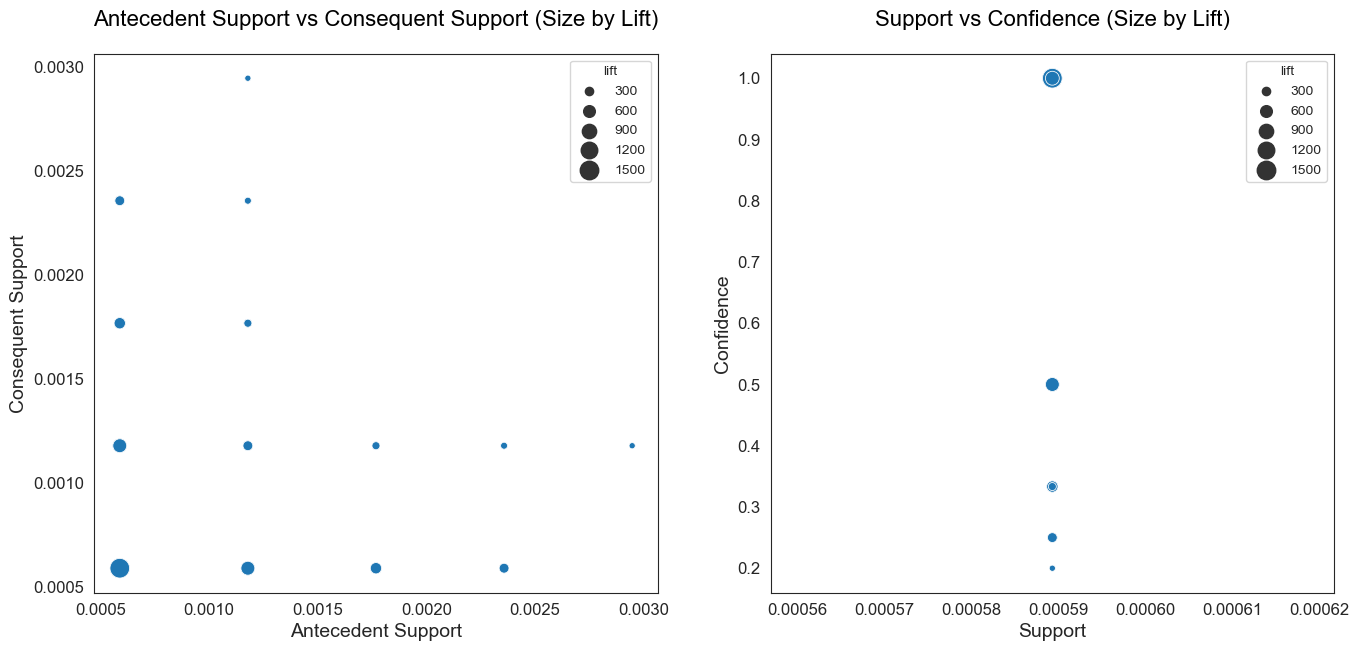

In [26]:
rules_scatterplot(rules_prod_cat2)

&#9865; **The results extracted from the scatterplot visualization are similar to the previous visualization, so we will also take the same insights and recommendations.**

<br>

- **We will filter association rules to identify actionable patterns for promoting less common products (rarely sold items) by retaining rules that meet the following criteria:**

  1. Antecedent Support ≥ 0.0017 (common starting products).

  2. Consequent Support < 0.0006 (rare target products).

  3. Lift ≥ 400 (exceptionally strong association).

In [27]:
pruned_rules2 = rules_prod_cat2[
    (rules_prod_cat2['antecedent support'] >= 0.0017) &
    (rules_prod_cat2['consequent support'] < 0.0006) &
    (rules_prod_cat2['lift'] >= 400)
].reset_index(drop=True)

pruned_rules2

antecedents  \
0  Violet and Black tartan plaid check tie cord f...   
1           Evan Picone Water Color Solid Skirt Suit   
2                         HUGO BOSS Men's Woven Pant   
3                    KNOTHE Broad Cloth PJ's #BCLOTH   
4       N by Natori Women's Mongolia Scoop Neck Gown   
5  Kimono Style Waffle Square pattern White Color...   
6  Minus33 100% Merino Wool Base Layer 803 Women'...   
7                    Solid - 100% Heavy Wool Scarves   

                                         consequents  antecedent support  \
0  Cloud Appliqued Bathrobe 100% Cotton Terry Clo...            0.002357   
1                 Intimo Women's Poly Charmeuse Robe            0.001768   
2  SILK COUTURE: Mens Sleepwear - Silk Boxer Shor...            0.001768   
3         Lightweight White Terry Velour Bathrobe 48            0.001768   
4  Karen Nueburger Women's Pop Long Sleeve Cardin...            0.001768   
5             Nautica Mens Sultan Stripe Woven Short            0.001768   
6        N by Natori Women's Mongolia Printed Pajama            0.002357   
7                     National Seersucker House Coat            0.001768   

   consequent support   support  confidence        lift  leverage  conviction  \
0            0.000589  0.000589    0.250000  424.250000  0.000588    1.332548   
1            0.000589  0.000589    0.333333  565.666667  0.000588    1.499116   
2            0.000589  0.000589    0.333333  565.666667  0.000588    1.499116   
3            0.000589  0.000589    0.333333  565.666667  0.000588    1.499116   
4            0.000589  0.000589    0.333333  565.666667  0.000588    1.499116   
5            0.000589  0.000589    0.333333  565.666667  0.000588    1.499116   
6            0.000589  0.000589    0.250000  424.250000  0.000588    1.332548   
7            0.000589  0.000589    0.333333  565.666667  0.000588    1.499116   

   zhangs_metric  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  
6            1.0  
7            1.0

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Results of Applying the association rules filter to the Dataset:

1. **Strong Lift Associations:**
   - All rules exhibit extremely high lift values (≥ 400), indicating that purchasing the antecedent product strongly correlates with purchasing the consequent product.
   - This suggests highly strategic cross-selling opportunities for specific product categories.


2. **Low Support Patterns:**
   - Antecedent Support (≤ 0.0018): The trigger products are relatively common..
   - Consequent Support (≤ 0.0006): The target products are even rarer.

- **These rules highlight niche but impactful relationships, often relevant for specialized or seasonal items.**

<br>

- **Apply parallel coordinates to visualizes product association rules.**

antecedents  \
0  Violet and Black tartan plaid check tie cord f...   
1           Evan Picone Water Color Solid Skirt Suit   
2                         HUGO BOSS Men's Woven Pant   
3                    KNOTHE Broad Cloth PJ's #BCLOTH   
4       N by Natori Women's Mongolia Scoop Neck Gown   
5  Kimono Style Waffle Square pattern White Color...   
6  Minus33 100% Merino Wool Base Layer 803 Women'...   
7                    Solid - 100% Heavy Wool Scarves   

                                         consequents  rule  
0  Cloud Appliqued Bathrobe 100% Cotton Terry Clo...     0  
1                 Intimo Women's Poly Charmeuse Robe     1  
2  SILK COUTURE: Mens Sleepwear - Silk Boxer Shor...     2  
3         Lightweight White Terry Velour Bathrobe 48     3  
4  Karen Nueburger Women's Pop Long Sleeve Cardin...     4  
5             Nautica Mens Sultan Stripe Woven Short     5  
6        N by Natori Women's Mongolia Printed Pajama     6  
7                     National Seersucker House Coat     7

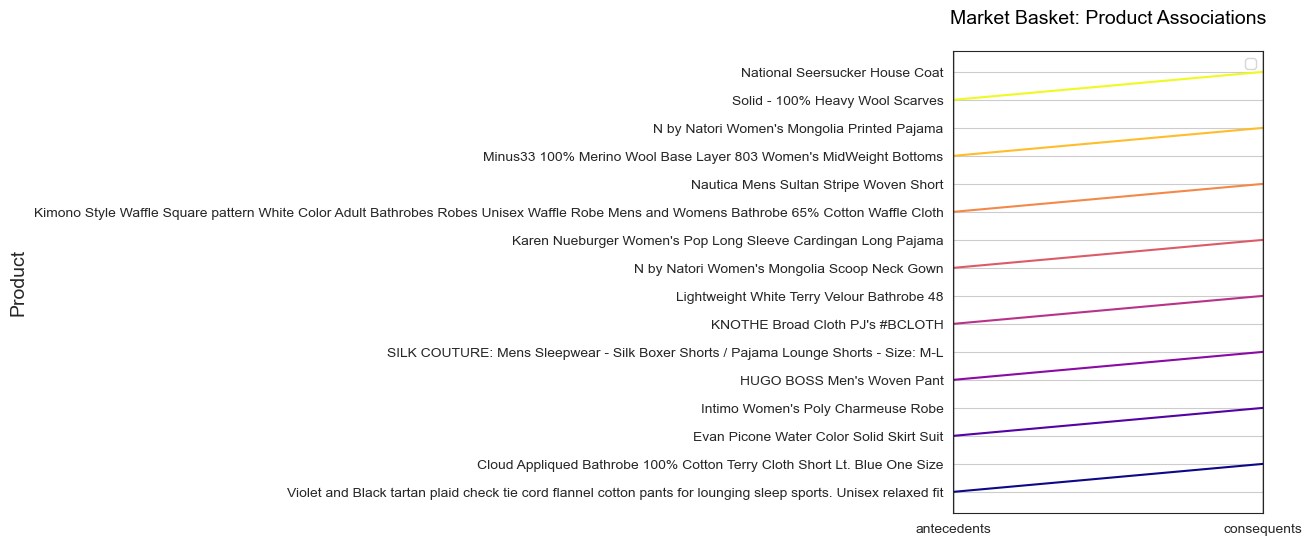

In [28]:
parallel_coord_rules(pruned_rules2, name_items = "Product", Colormap="plasma", figsize=(4,6))

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Visualization Insights (Parallel Coordinates Plot):

- **The parallel coordinates plot will highlight strong links between luxury and niche clothing categories, such as:**

  1. Suits → Sleepwear (e.g., "Evan Picone Water Color Skirt Suit" → "Intimo Women's Charmeuse Robe").
  2. Jumpsuits → Lounge Sets (e.g., "HUGO BOSS Men's Woven Pant" → "Silk Couture Men's Silk Boxer Shorts").
  
  - A consistent pattern of low support yet high lift will emerge, reinforcing the dataset’s focus on rare but significant associations.


- **Actionable Recommendations:** 

  - Targeted Promotions: Bundle niche items (e.g., premium suits with luxury sleepwear) to enhance sales.
  
     
- **Specialized Campaigns:**

  - Use these rules to market high-margin, low-volume products through exclusive deals.

<a id="ModG1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Moderate Positive Correlation Categories for Group 1:<br><br>"Active, Maternity, Leggings, Socks & Hosiery"</b></div>

- **Filter data on columns for group 1.**

In [29]:
categories3 = ["Active", "Maternity", "Leggings", "Socks & Hosiery"]

df_market_prod_cat3 = df_market[df_market["category"].isin(categories3)]

df_market_prod_cat3

invoice_no  product_id  \
1           98298        5803   
6           98300        2509   
40          56344        3050   
64          12634        9036   
85          60875        5900   
...           ...         ...   
18794       77661        6052   
18795       77662        9293   
18799       77661       15132   
18801      108071        9338   
18806       22384        2831   

                                     product_description         category  
1      LOCOMO Women Patriot Patriotic Great Britain B...         Leggings  
6      Russell Athletic Womens Warmup Running Jogging...           Active  
40                      Arc'teryx Atom LT Vest - Women's           Active  
64              Angelina Faux Fur Leg Warmer/Boot Topper  Socks & Hosiery  
85                 Capelli New York Cargo Jersey Legging         Leggings  
...                                                  ...              ...  
18794               David Lerner Women's Ribbed Leggings         Leggings  
18795  Women's Argyle Socks 12 Pair Size 9-11 Crew Le...  Socks & Hosiery  
18799  Three Seasons Maternity Women's Solid V-Neck S...        Maternity  
18801     Black & White Swirled Leggings Footless Tights  Socks & Hosiery  
18806  Woman Within Plus Size Tall Sweat Pants in eas...           Active  

[2241 rows x 4 columns]

<br>

- **Number of products in group 1.**

In [30]:
df_market_prod_cat3.product_description.nunique()

1659

<br>

- **Apply pruning to product_description items, using a minimum of 0.0004 as a support threshold limit for frequent itemsets.**

In [31]:
freq_item_prod_cat3 = prep_trans_prune(data = df_market_prod_cat3, items_col = "product_description", Min_support = 0.0004)
freq_item_prod_cat3

support                                           itemsets
0     0.00094         ('Sexy Legs' Beaded Band Fashion Leggings)
1     0.00047    ('Sexy Legs' Birch Tree Print Fashion Leggings)
2     0.00141  ('Sexy Legs' Black Jean Stretch Fashion Leggings)
3     0.00094  ('Sexy Legs' Black Leopard Print Fashion Leggi...
4     0.00094        ('Sexy Legs' Exotic Print Fashion Leggings)
...       ...                                                ...
1776  0.00047  (Ripe Maternity Women's Basic A-Line Skirt, ad...
1777  0.00047  (Wrightsock Women's Coolmesh Ii Crew 3 Pack At...
1778  0.00047  (Shock Absorber Women's Classic Sports Bra, Th...
1779  0.00047  (Smartwool Men's PhD Ski Ultra Light Sock, Sma...
1780  0.00047  (Soxnet Women's Neon Socks - Striped Low Cut 6...

[1781 rows x 2 columns]

<br>

- ِ**Apply association rules table and the formatted version for display.**

In [32]:
rules_prod_cat3, highlighted_prod_cat3 = analyze_associations(freq_item_prod_cat3)

highlighted_prod_cat3

<br>

- **Apply scatter plots to visualize association rule metrics.**

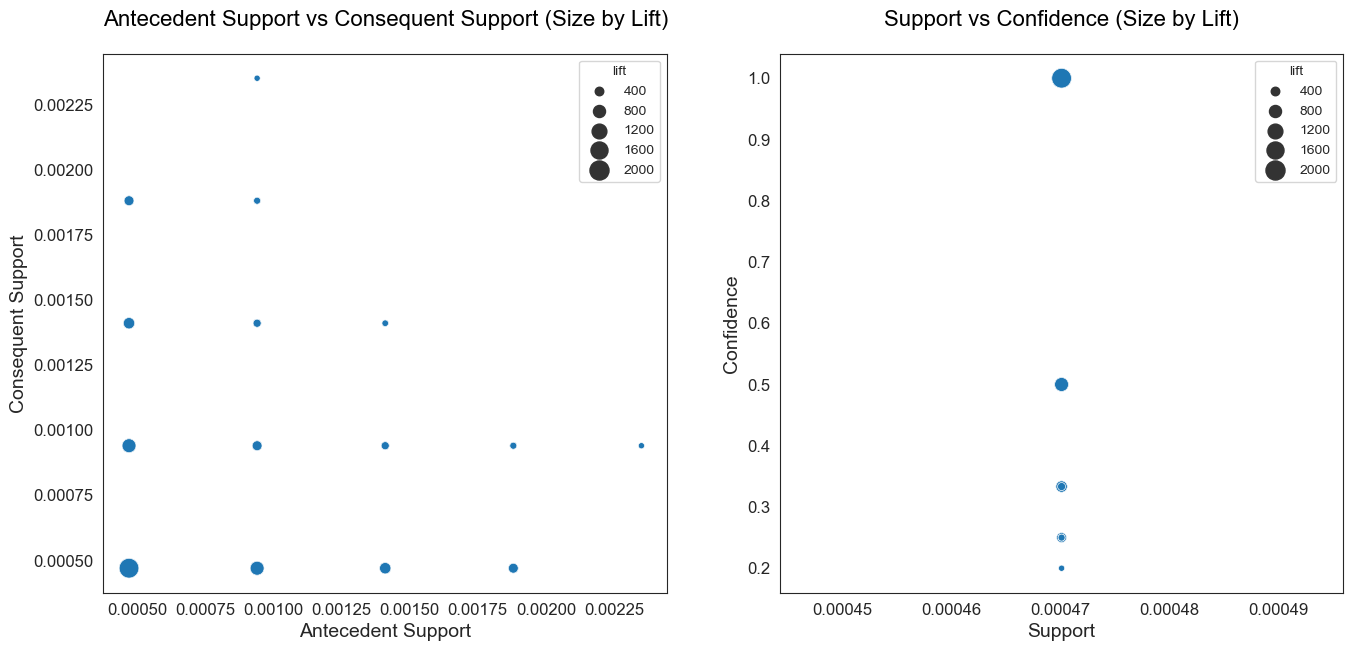

In [33]:
rules_scatterplot(rules_prod_cat3)

<br>

- **We will filter association rules to identify actionable patterns for promoting less common products (rarely sold items) by retaining rules that meet the following criteria:**

1. Antecedent Support ≥ 0.001 (common starting products).

2. Consequent Support < 0.0005 (rare target products).

3. Lift ≥ 500 (exceptionally strong association).

In [34]:
pruned_rules3 = rules_prod_cat3[
    (rules_prod_cat3['antecedent support'] >= 0.001) &
    (rules_prod_cat3['consequent support'] < 0.0005) &
    (rules_prod_cat3['lift'] >= 500)
].reset_index(drop=True)

pruned_rules3

antecedents  \
0          AX Paris Crocodile Metallic Print Leggings   
1             Anita Women's Extreme Control Sport Bra   
2   Anne Klein Women's 2-Pack Argyle  Cashmere Ble...   
3   Anne Klein Women's 3 Pack Diamond Stripe Trous...   
4            Hot Milk Women's Luminous French Knicker   
5   Motherhood Maternity: Sleeveless Clip Down Dou...   
6              Moving Comfort Women's Endurance Capri   
7        Only Hearts Women's I Heart Tapestry Legging   
8        Medela Seamless Underwire Nursing Bra #36-98   
9        Motherhood Maternity: Wrap Nursing Sleep Bra   
10  Three Seasons Maternity Women's 3/4 Sleeve Dra...   
11  Sock It To Me Gnomes Knee High Socks (One Size...   

                                          consequents  antecedent support  \
0           John Deere Womens Pull Over Fleece Hoodie            0.001881   
1                  Magic Suit Women's Corynne Tankini            0.001881   
2                  Hot Milk Women's Nightfall Chemise            0.001881   
3                    adidas Women's Eqt10 Graphic Tee            0.001410   
4   Carhartt Women's Work-Dry Lightweight Coolmax ...            0.001410   
5         Collections Etc - Basic Activewear Leggings            0.001410   
6   Comics Girl Vintage - Multicoloured Opaque Pri...            0.001410   
7   Hyp Women's 5.5 oz Cotton/Spandex Stretch Loun...            0.001410   
8   Ilitia Women's Garters Design Sheer Tights One...            0.001410   
9      Mermaid Maternity Fold Over Panel Board Shorts            0.001410   
10                  Miraclebody Thelma Denim Leggings            0.001410   
11  Motherhood Maternity: Button Front Maternity Coat            0.001410   

    consequent support  support  confidence    lift  leverage  conviction  \
0              0.00047  0.00047    0.250000  531.75  0.000469    1.332706   
1              0.00047  0.00047    0.250000  531.75  0.000469    1.332706   
2              0.00047  0.00047    0.250000  531.75  0.000469    1.332706   
3              0.00047  0.00047    0.333333  709.00  0.000469    1.499295   
4              0.00047  0.00047    0.333333  709.00  0.000469    1.499295   
5              0.00047  0.00047    0.333333  709.00  0.000469    1.499295   
6              0.00047  0.00047    0.333333  709.00  0.000469    1.499295   
7              0.00047  0.00047    0.333333  709.00  0.000469    1.499295   
8              0.00047  0.00047    0.333333  709.00  0.000469    1.499295   
9              0.00047  0.00047    0.333333  709.00  0.000469    1.499295   
10             0.00047  0.00047    0.333333  709.00  0.000469    1.499295   
11             0.00047  0.00047    0.333333  709.00  0.000469    1.499295   

    zhangs_metric  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
5             1.0  
6             1.0  
7             1.0  
8             1.0  
9             1.0  
10            1.0  
11            1.0

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Results of Applying the association rules filter to the Dataset:

1. **Consistently High Lift Values:**

   - All rules exhibit extremely high lift (≥ 531), indicating a strong association between antecedent and consequent products.
   - This suggests that purchasing the antecedent almost guarantees purchasing the consequent, making these rules valuable for targeted recommendations.
   
   
2. **Low Support Trends:**

   - Antecedent Support (~0.0014 - 0.0019): The triggering products are relatively rare.
   - Consequent Support (~0.00047): The target products are even less frequent.
   
- **This indicates niche but potentially high-value cross-selling opportunities.**

<br>

- **Apply parallel coordinates to visualizes product association rules.**

antecedents  \
0          AX Paris Crocodile Metallic Print Leggings   
1             Anita Women's Extreme Control Sport Bra   
2   Anne Klein Women's 2-Pack Argyle  Cashmere Ble...   
3   Anne Klein Women's 3 Pack Diamond Stripe Trous...   
4            Hot Milk Women's Luminous French Knicker   
5   Motherhood Maternity: Sleeveless Clip Down Dou...   
6              Moving Comfort Women's Endurance Capri   
7        Only Hearts Women's I Heart Tapestry Legging   
8        Medela Seamless Underwire Nursing Bra #36-98   
9        Motherhood Maternity: Wrap Nursing Sleep Bra   
10  Three Seasons Maternity Women's 3/4 Sleeve Dra...   
11  Sock It To Me Gnomes Knee High Socks (One Size...   

                                          consequents  rule  
0           John Deere Womens Pull Over Fleece Hoodie     0  
1                  Magic Suit Women's Corynne Tankini     1  
2                  Hot Milk Women's Nightfall Chemise     2  
3                    adidas Women's Eqt10 Graphic Tee     3  
4   Carhartt Women's Work-Dry Lightweight Coolmax ...     4  
5         Collections Etc - Basic Activewear Leggings     5  
6   Comics Girl Vintage - Multicoloured Opaque Pri...     6  
7   Hyp Women's 5.5 oz Cotton/Spandex Stretch Loun...     7  
8   Ilitia Women's Garters Design Sheer Tights One...     8  
9      Mermaid Maternity Fold Over Panel Board Shorts     9  
10                  Miraclebody Thelma Denim Leggings    10  
11  Motherhood Maternity: Button Front Maternity Coat    11

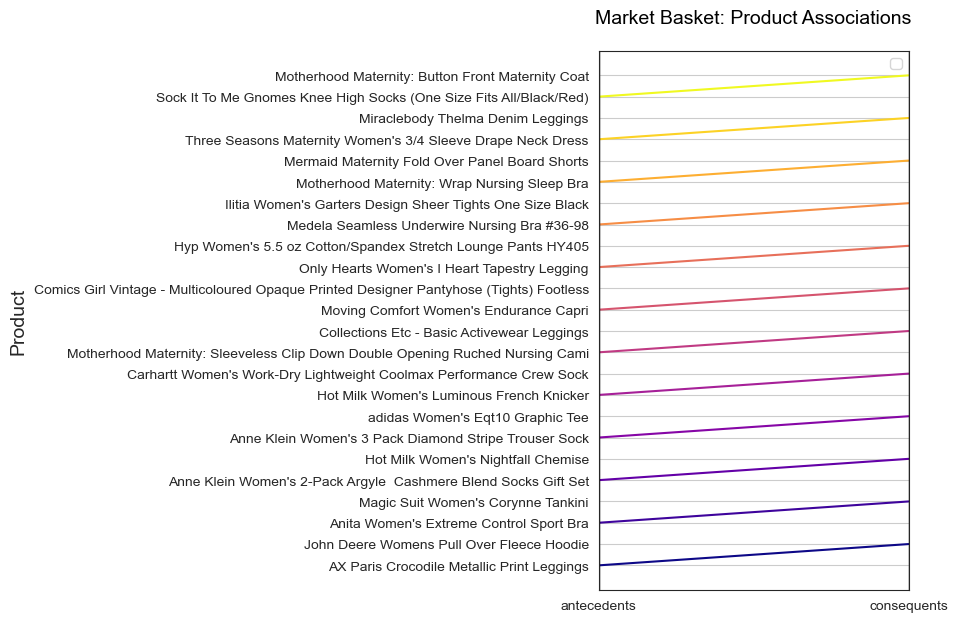

In [35]:
parallel_coord_rules(pruned_rules3, name_items = "Product", Colormap="plasma", figsize=(4,7))

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Visualization Insights (Parallel Coordinates Plot):

- **A parallel coordinates plot would likely show distinct, strong connections between product pairs such as:**

     1. Leggings → Hoodies (e.g., "AX Paris Crocodile Metallic Print Leggings" → "John Deere Women's Pull Over Fleece Hoodie").
     2. Sports Bras → Tankinis (e.g., "Anita Women's Extreme Control Sport Bra" → "Magic Suit Women's Corynne Tankini").
     3. Maternity Sleepwear → Socks & Hosiery (e.g., "Anne Klein Women's Argyle Cashmere Socks" → "Hot Milk Women's Nightfall Chemise").
     
     
- **Actionable Recommendations:**

   - **Targeted Bundling:** Use these associations for personalized product recommendations, such as bundling activewear with complementary items.
    
  - **Niche Marketing:** Focus on premium, specialized campaigns for these rare but strong relationships.
  
  - **Broader Exploration:** Consider slightly relaxing support thresholds to uncover additional high-confidence associations

<a id="ModG2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Moderate Positive Correlation Categories for Group 2:<br><br>"Jeans, Accessories, Socks"</b></div>

- **Filter data on columns for group 2.**

In [36]:
categories4 = ["Jeans", "Accessories", "Socks"]

df_market_prod_cat4 = df_market[df_market["category"].isin(categories4)]

df_market_prod_cat4

invoice_no  product_id  \
0           98298       13928   
19          68179       25141   
26          44867       21360   
30          38161       24496   
36          11826       25250   
...           ...         ...   
18786      116962       28995   
18796       77663       14078   
18802      108071        4445   
18810      102757       21544   
18812       61602       29090   

                                     product_description     category  
0      Low Profile Dyed Cotton Twill Cap - Putty W39S55D  Accessories  
19     6-pack Champion Men's Performance All Sport Tu...        Socks  
26     G by GUESS Korbin Slim Jeans - Trenton Wash - ...        Jeans  
30                   Smartwool Men's PhD Ski Medium Sock        Socks  
36     Diabetic Socks : Mens Ribbed Navy 3 Pack-(Suga...        Socks  
...                                                  ...          ...  
18786             Skechers Men's 5017 Aviator Sunglasses  Accessories  
18796               Genuine Leather Mini Wallet by Rolfs  Accessories  
18802  Wrangler Juniors' Q-Baby Tuff Buck Stretch Boo...        Jeans  
18810                    Oneill Men's Tacoma Denim Short        Jeans  
18812                            Long Beanie-Red W16S24E  Accessories  

[3011 rows x 4 columns]

<br>

- **Number of products in group 1.**

In [37]:
df_market_prod_cat4.product_description.nunique()

2081

<br>

- **Apply pruning to product_description items, using a minimum of 0.0002 as a support threshold limit for frequent itemsets.**

In [38]:
freq_item_prod_cat4 = prep_trans_prune(data = df_market_prod_cat4, items_col = "product_description", Min_support = 0.0002)
freq_item_prod_cat4

support                                           itemsets
0     0.001074           (!iT Jeans Women's Curvy Slim Boot Jean)
1     0.001074            (!iT Jeans Women's Curvy Stiletto Jean)
2     0.000358  ((One) CHEER Rhinestone Studded Stretch Headband)
3     0.000716  ((Set of 4) 2.5 Glitter Cotton Stretch Headbands)
4     0.000358              (1 1/2 In. Original Perry Suspenders)
...        ...                                                ...
2311  0.000358  (Vince Camuto Men's Bold Stripes Dress Socks, ...
2312  0.000358  (Wrangler Men's Cowboy Cut Western Slim Fit Je...
2313  0.000358  (Women's Italian Silk Lined Leather Gloves By ...
2314  0.000358  (dollhouse Juniors Rocker Skinny Jegging, Wome...
2315  0.000358  (Yupoong Wool Blend Snapback Snap Back Hat Bas...

[2316 rows x 2 columns]

<br>

- ِ**Apply association rules table and the formatted version for display.**

In [39]:
rules_prod_cat4, highlighted_prod_cat4 = analyze_associations(freq_item_prod_cat4)

highlighted_prod_cat4

<br>

- **Apply scatter plots to visualize association rule metrics.**

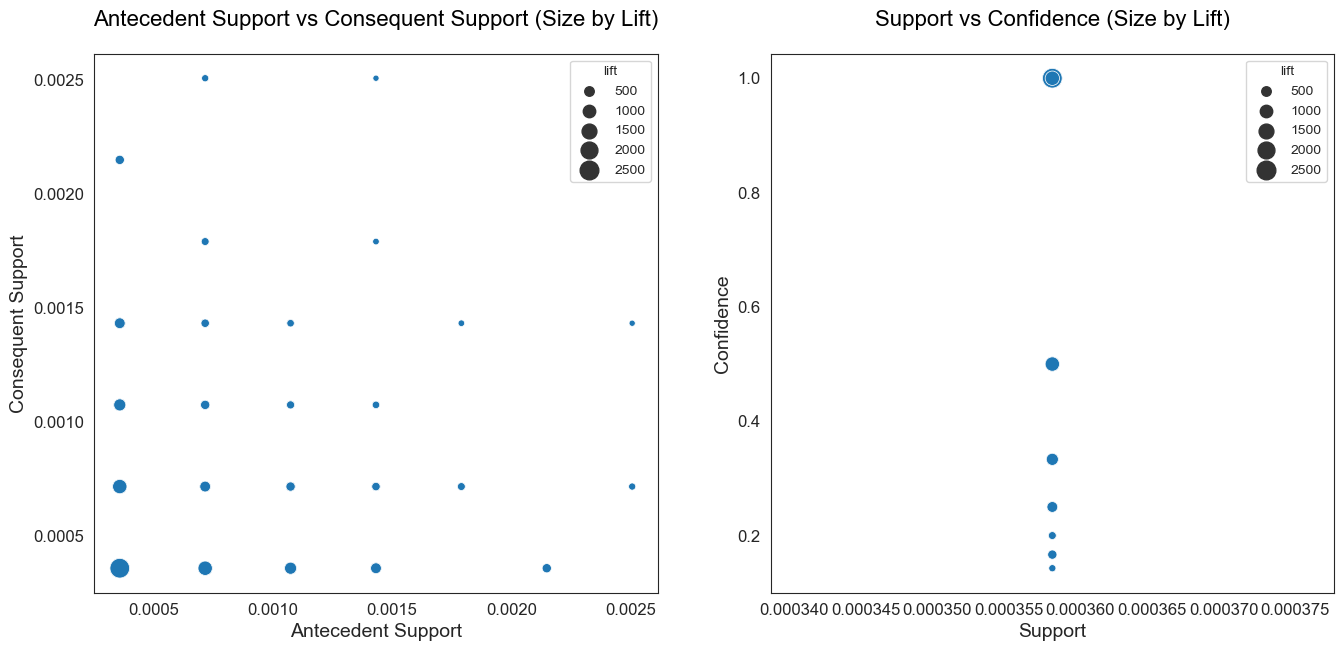

In [40]:
rules_scatterplot(rules_prod_cat4)

<br>

- **We will filter association rules to identify actionable patterns for promoting less common products (rarely sold items) by retaining rules that meet the following criteria:**

  1. Antecedent Support ≥ 0.001 (common starting products).

  2. Consequent Support < 0.0004 (rare target products).

  3. Lift ≥ 900 (exceptionally strong association).

In [41]:
pruned_rules4 = rules_prod_cat4[
    (rules_prod_cat4['antecedent support'] >= 0.001) &
    (rules_prod_cat4['consequent support'] < 0.0004) &
    (rules_prod_cat4['lift'] >= 900)
].reset_index(drop=True)

pruned_rules4

antecedents  \
0   WIGWAM MILLS INC F4707-052-OS WORSTED WOOL WAT...   
1    7 For All Mankind Men's Austyn Straight Leg Jean   
2   Not Your Daughter's Jeans Women's Petite Jade ...   
3         Wrangler Men's Cowboy Cut Original Fit Jean   
4     Eddie Bauer Straight Fit Color Bull Denim Jeans   
5   Dan Post Cowboy Certified Over-The-Calf Boot S...   
6     Sock It To Me Argyle Mustache Men's Sock (Blue)   
7                          Lucky Brand Mens Dean Jean   
8                       Stacy Adams Men's Felt Fedora   
9          Joe's Jeans Men's Straight Leg Classic Fit   
10        Wrangler Men's Rugged Wear Classic Fit Jean   
11  G-Star Raw - Mens Attacc Low Straight Leg Jean...   
12  GRAND RIVER Regular Fit Stretch Jeans - In Blu...   
13  Silver Jeans Men's Dark Wash Nash Straight Leg...   
14  Haggar Men's Work To Weekend Expandable Waist ...   
15  Haggar Men's Work To Weekend Expandable Waist ...   
16  Polo Ralph Lauren 3 Pack Classic Cotton Sport ...   
17                             Volcom Men's Nova Jean   
18               Kenneth Cole Men's 6-Pack Dress Sock   
19               Kenneth Cole Men's 6-Pack Dress Sock   
20  Leather in Chicago Mens Trifold Genuine Leathe...   
21                           Lee Men's Carpenter Jean   
22    Not Your Daughter's Jeans Women's Alina Legging   
23  Royal Classic Mens Pattern Dress Socks Cotton ...   
24           Levi's Women's Mid Rise Skinny Boot Jean   
25                  Michael Stars Women's Crepe Scarf   
26    Not Your Daughter's Jeans Women's Alina Legging   
27                          Thorlo Men's Ski Max Sock   
28  Wrangler Men's Cowboy Cut Original Fit Western...   
29        Vince Camuto Men's Bold Stripes Dress Socks   
30                             Volcom Men's Nova Jean   

                                          consequents  antecedent support  \
0           3 - Prs. 5.11 Tactical 9 inch Socks Black            0.001074   
1            Boxed 3 pc. Initial Cotton Handkerchiefs            0.001074   
2   Acrylic Tallit (imitation Wool) Prayer Shawl i...            0.001074   
3   Calvin Klein Men's Feather Edge Leather Belt W...            0.001074   
4                        Canyon Ridge Loose Fit Jeans            0.001074   
5      Vince Camuto Men's Checkered Board Dress Socks            0.001074   
6                              District Slouch Beanie            0.001074   
7                        FITS Medium Hiker Crew Socks            0.001074   
8        Fancy Colorful Cotton Socks 2 Pairs per Pack            0.001074   
9               Fox River Stryker Military Boot Socks            0.001074   
10                G-Star Men's New Radar Slim DT Jean            0.001074   
11           Silver Jeans Men's Zac Straight Leg jean            0.001074   
12  LRG Core Collection The Core Collection Panda ...            0.001074   
13     Gold Toe Men's ADC Aquafx Adams Rib Dress Sock            0.001074   
14  Red Kap Basic Work Jean Indigo 100% Pre-washed...            0.001074   
15   Wrangler Men's Tall Rugged Wear Classic Fit Jean            0.001074   
16        Joe's Jeans Men's Brixton Straight Leg Jean            0.001074   
17                     K. Bell Socks Men's 3d Squares            0.001074   
18   Van Heusen Men's 3 Pack Half Cushion Casual Crew            0.001074   
19  Wigwam Men's Super 60 Tube 3-Pack Over-the-Cal...            0.001074   
20        Wrightsock Unisex 3-Pack Running Crew Socks            0.001074   
21  Polo Ralph Lauren Men's Dress/Fashion Socks 3 ...            0.001074   
22                         Levi Women's Stretch Denim            0.001074   
23                 Levi's Men's 510 Super Skinny Jean            0.001074   
24            Levi's Women's 529 Styled Straight Jean            0.001074   
25  Ray-Ban RB 3119 OLYMPIAN Metal-Frame Sunglasse...            0.001074   
26       Royal Bones Rose Lace Split Leg Skinny Jeans            0.001074   
27        Savane Men's Relaxed Straight 5-Pocket Jean        

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Results of Applying the association rules filter to the Dataset:

1. **Exceptionally High Lift Values:**

   - All rules exhibit a significantly high lift (≈ 931), indicating a near-certain association between antecedent and consequent products.
   - These associations highlight strategic cross-selling potential for niche accessories and apparel.
   
   
2. **Low Support Patterns:**
  
   - Antecedent Support ≈ 0.00107: The trigger products are relatively common.
   - Consequent Support ≈ 0.00036: The target products are even rarer.
   
- **This suggests that these rules represent rare but highly impactful purchasing behaviors.**

<br>

- **Apply parallel coordinates to visualizes product association rules.**

antecedents  \
0   WIGWAM MILLS INC F4707-052-OS WORSTED WOOL WAT...   
1    7 For All Mankind Men's Austyn Straight Leg Jean   
2   Not Your Daughter's Jeans Women's Petite Jade ...   
3         Wrangler Men's Cowboy Cut Original Fit Jean   
4     Eddie Bauer Straight Fit Color Bull Denim Jeans   
5   Dan Post Cowboy Certified Over-The-Calf Boot S...   
6     Sock It To Me Argyle Mustache Men's Sock (Blue)   
7                          Lucky Brand Mens Dean Jean   
8                       Stacy Adams Men's Felt Fedora   
9          Joe's Jeans Men's Straight Leg Classic Fit   
10        Wrangler Men's Rugged Wear Classic Fit Jean   
11  G-Star Raw - Mens Attacc Low Straight Leg Jean...   
12  GRAND RIVER Regular Fit Stretch Jeans - In Blu...   
13  Silver Jeans Men's Dark Wash Nash Straight Leg...   
14  Haggar Men's Work To Weekend Expandable Waist ...   
15  Haggar Men's Work To Weekend Expandable Waist ...   
16  Polo Ralph Lauren 3 Pack Classic Cotton Sport ...   
17                             Volcom Men's Nova Jean   
18               Kenneth Cole Men's 6-Pack Dress Sock   
19               Kenneth Cole Men's 6-Pack Dress Sock   
20  Leather in Chicago Mens Trifold Genuine Leathe...   
21                           Lee Men's Carpenter Jean   
22    Not Your Daughter's Jeans Women's Alina Legging   
23  Royal Classic Mens Pattern Dress Socks Cotton ...   
24           Levi's Women's Mid Rise Skinny Boot Jean   
25                  Michael Stars Women's Crepe Scarf   
26    Not Your Daughter's Jeans Women's Alina Legging   
27                          Thorlo Men's Ski Max Sock   
28  Wrangler Men's Cowboy Cut Original Fit Western...   
29        Vince Camuto Men's Bold Stripes Dress Socks   
30                             Volcom Men's Nova Jean   

                                          consequents  rule  
0           3 - Prs. 5.11 Tactical 9 inch Socks Black     0  
1            Boxed 3 pc. Initial Cotton Handkerchiefs     1  
2   Acrylic Tallit (imitation Wool) Prayer Shawl i...     2  
3   Calvin Klein Men's Feather Edge Leather Belt W...     3  
4                        Canyon Ridge Loose Fit Jeans     4  
5      Vince Camuto Men's Checkered Board Dress Socks     5  
6                              District Slouch Beanie     6  
7                        FITS Medium Hiker Crew Socks     7  
8        Fancy Colorful Cotton Socks 2 Pairs per Pack     8  
9               Fox River Stryker Military Boot Socks     9  
10                G-Star Men's New Radar Slim DT Jean    10  
11           Silver Jeans Men's Zac Straight Leg jean    11  
12  LRG Core Collection The Core Collection Panda ...    12  
13     Gold Toe Men's ADC Aquafx Adams Rib Dress Sock    13  
14  Red Kap Basic Work Jean Indigo 100% Pre-washed...    14  
15   Wrangler Men's Tall Rugged Wear Classic Fit Jean    15  
16        Joe's Jeans Men's Brixton Straight Leg Jean    16  
17                     K. Bell Socks Men's 3d Squares    17  
18   Van Heusen Men's 3 Pack Half Cushion Casual Crew    18  
19  Wigwam Men's Super 60 Tube 3-Pack Over-the-Cal...    19  
20        Wrightsock Unisex 3-Pack Running Crew Socks    20  
21  Polo Ralph Lauren Men's Dress/Fashion Socks 3 ...    21  
22                         Levi Women's Stretch Denim    22  
23                 Levi's Men's 510 Super Skinny Jean    23  
24            Levi's Women's 529 Styled Straight Jean    24  
25  Ray-Ban RB 3119 OLYMPIAN Metal-Frame Sunglasse...    25  
26       Royal Bones Rose Lace Split Leg Skinny Jeans    26  
27        Savane Men's Relaxed Straight 5-Pocket Jean    27  
28  Timberland Deep Cognac Buff Apache Trifold Lea...    28  
29  Wrangler Men's Original Cowboy Cut Relaxed Fit...    29  
30    Wrangler Men's Cowboy Cut Western Slim Fit Jean    30

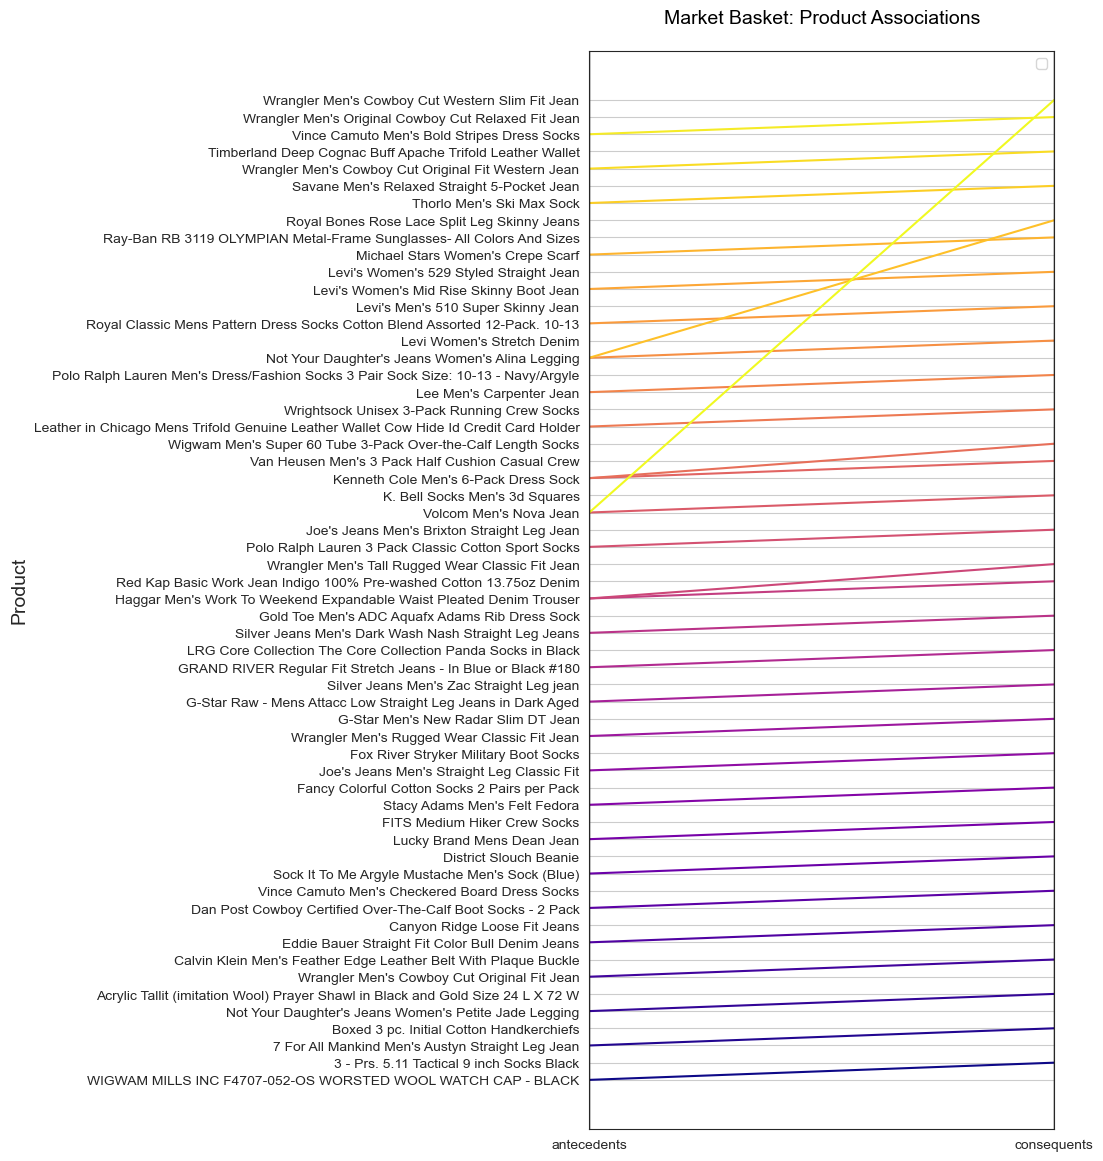

In [42]:
parallel_coord_rules(pruned_rules4, name_items = "Product", Colormap="plasma", figsize=(6,14))

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Visualization Insights (Parallel Coordinates Plot):

- **The parallel coordinates plot will emphasize clear connections between Jeans, Accessories, and Socks, forming strong but infrequent purchasing patterns.**


- **Notable product pairs include:**

  1. Men’s Jeans → Leather Belts (e.g., "Wrangler Men's Cowboy Cut Jeans" → "Calvin Klein Men's Feather Edge Leather Belt").
  2. Wool Socks → Tactical Socks (e.g., "WIGWAM MILLS Wool Watch Cap" → "5.11 Tactical 9-inch Socks").
  3. Denim Jeans → Handkerchiefs (e.g., "7 For All Mankind Men's Austyn Straight Leg Jean" → "Boxed 3 pc. Initial Cotton Handkerchiefs").
  
  
  
- **Actionable Recommendations:**

  1. **Targeted Bundling:**
     - Bundle high-end jeans with accessories like belts or handkerchiefs to increase basket size.
     - Promote premium socks alongside tactical or wool-based sock purchases.
    
  2. **Niche Marketing:**
     - Leverage rare but high-value rules to create personalized campaigns for accessories and socks, targeting specific buyer segments.

<a id="MBA-Cat"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Market Basket Analysis for Categories </b></div>

In [43]:
frequent_item_cat = prep_trans_prune(data = df_market, items_col = "category", Min_support = 0.00005)
frequent_item_cat

support                  itemsets
0    0.075486             (Accessories)
1    0.071826                  (Active)
2    0.024171       (Blazers & Jackets)
3    0.001525           (Clothing Sets)
4    0.045825                 (Dresses)
..        ...                       ...
285  0.004499   (Sweaters, Tops & Tees)
286  0.002516     (Sweaters, Underwear)
287  0.004422       (Swim, Tops & Tees)
288  0.003126         (Underwear, Swim)
289  0.004194  (Underwear, Tops & Tees)

[290 rows x 2 columns]

In [44]:
rules_cat, highlighted_cat = analyze_associations(frequent_item_cat)

highlighted_cat

In [45]:
rules_cat.to_csv("rules_cat.csv", index=False)

In [46]:
rules_cat.describe().T

count      mean       std       min       25%       50%  \
antecedent support  528.0  0.057415  0.030320  0.001525  0.029813  0.069234   
consequent support  528.0  0.057415  0.030320  0.001525  0.029813  0.069234   
support             528.0  0.002027  0.001565  0.000076  0.000762  0.001449   
confidence          528.0  0.037938  0.022520  0.000776  0.019526  0.039039   
lift                528.0  0.740935  0.464113  0.089726  0.501307  0.616014   
leverage            528.0 -0.001181  0.001240 -0.005566 -0.001878 -0.001013   
conviction          528.0  0.979773  0.022173  0.915457  0.963042  0.979355   
zhangs_metric       528.0 -0.306421  0.313379 -0.917860 -0.516846 -0.405009   

                         75%       max  
antecedent support  0.084483  0.102402  
consequent support  0.084483  0.102402  
support             0.003202  0.006176  
confidence          0.051020  0.150000  
lift                0.814971  5.419421  
leverage           -0.000151  0.001331  
conviction          0.995584  1.067819  
zhangs_metric      -0.191821  0.823072

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Statistical Insights:

1. **Antecedent & Consequent Support:**

   - **Mean:** 0.057 (i.e. 5.7% of transactions have antecedent or consequent elements).

   - **Standard Deviation (Std):** 0.030, indicating moderate variability in the data.

   - **Max:** 0.102, meaning that some elements appear in about 10.2% of transactions.

   - **Min:** 0.0015, indicating that there are very rare elements in the data.

   - **Insight:**

     - Most rules have low to moderate antecedent and consequent support, meaning that individual elements are not very common.

     - Rules with high support (above 0.05) may be more reliable because they reflect more common behavior.
     
     

2. **Overall Support:**

   - **Mean:** 0.002 (i.e. 0.2% of transactions have both elements).

   - **Standard deviation (Std):** 0.0015, indicating low variance.

   - **Max:** 0.006, meaning that some rules appear in 0.6% of transactions.

   - **Min:** 0.000076, indicating that there are very rare rules.

   - **Insight:**

     - Overall support is generally low, indicating that most rules are generated by a small number of transactions.

     - Rules with higher overall support (above 0.003) may be more useful in practical applications.
     
     

3. **Confidence:**

   - **Mean:** 0.037 (i.e. 3.7% of transactions that contain the previous item also contain the next item).

   - **Standard deviation (Std):** 0.022, indicating moderate variance.

   - **Max:** 0.15, meaning that some rules have relatively high confidence.

   - **Min:** 0.00077, indicating very weak rules.

   - **Insight:**

     - Confidence is generally low, meaning that the associations between items are not strong.

     - Rules with high confidence (above 0.05) may be more reliable.
     
     

4. **Lift:**

   - **Mean:** 0.741, indicating that most rules have a positive but not strong association.

   - **Standard deviation (Std):** 0.464, indicating a large variation in lift values.

   - **Max:** 5.419, meaning that some rules have a very strong association.

   - **Min:** 0.089, indicating that rules have weak or negative associations.

   - **Insight:**

     - Rules with high lift (above 1.5) may be valuable, but their support and confidence should be checked.

     - Rules with low lift (less than 1) may be unhelpful or misleading.
     
     

5. **Leverage:**

   - **Mean:** -0.001, indicating that most rules have negative or near-zero leverage.

   - **Standard Deviation (Std):** 0.0012, indicating low variance.

   - **Max:** 0.0013, indicating that some rules have slight positive leverage.

   - **Min:** -0.0055, indicating that there are rules with strong negative leverage.

   - **Insight:**

     - Negative leverage indicates that some rules may be irrelevant or misleading.

     - Rules with positive leverage (above 0.001) may be more reliable.
     
     

6. **Conviction:**

   - **Mean:** 0.980, indicating that most rules have a convincing close to 1 (i.e. no strong effect).

   - **Standard Deviation (Std):** 0.022, indicating low variance.

   - **Max:** 1.068, which means that some rules have slightly high persuasion.

   - **Min:** 0.915, which indicates that there are rules with low persuasion.

   - **Insight:**

     - A persuasion close to 1 indicates that the rules are not very strong in predicting the next item.

     - Rules with higher persuasion (above 1.05) may be more useful.
     
     

7. **Zhang metric (zhangs_metric):**

   - **Mean:** -0.306, which indicates that most rules have a negative or weak correlation.

   - **Standard deviation (Std):** 0.313, which indicates a large variation in the metric values.

   - **Max:** 0.823, which indicates that some rules have a strong positive correlation.

   - **Min:** -0.918, which indicates that there are rules with a strong negative correlation.

   - **Insight:**

     - Rules with positive zhangs_metric (above 0.5) may be of high value, such as rules associated with "Clothing Sets" or "Suits".

     - Rules with negative zhangs_metric (less than 0) may be misleading or irrelevant.

     - Focusing on rules with positive and moderate zhangs_metric (between 0.2 and 0.5) may provide more reliable recommendations.



- **Conclusion:** 
  - Statistical analysis shows that most rules have low support and confidence, but some rules with positive zhangs_metric and high leverage may be valuable. 
  
  - Focusing on these rules can improve the effectiveness of recommendations in the online store.

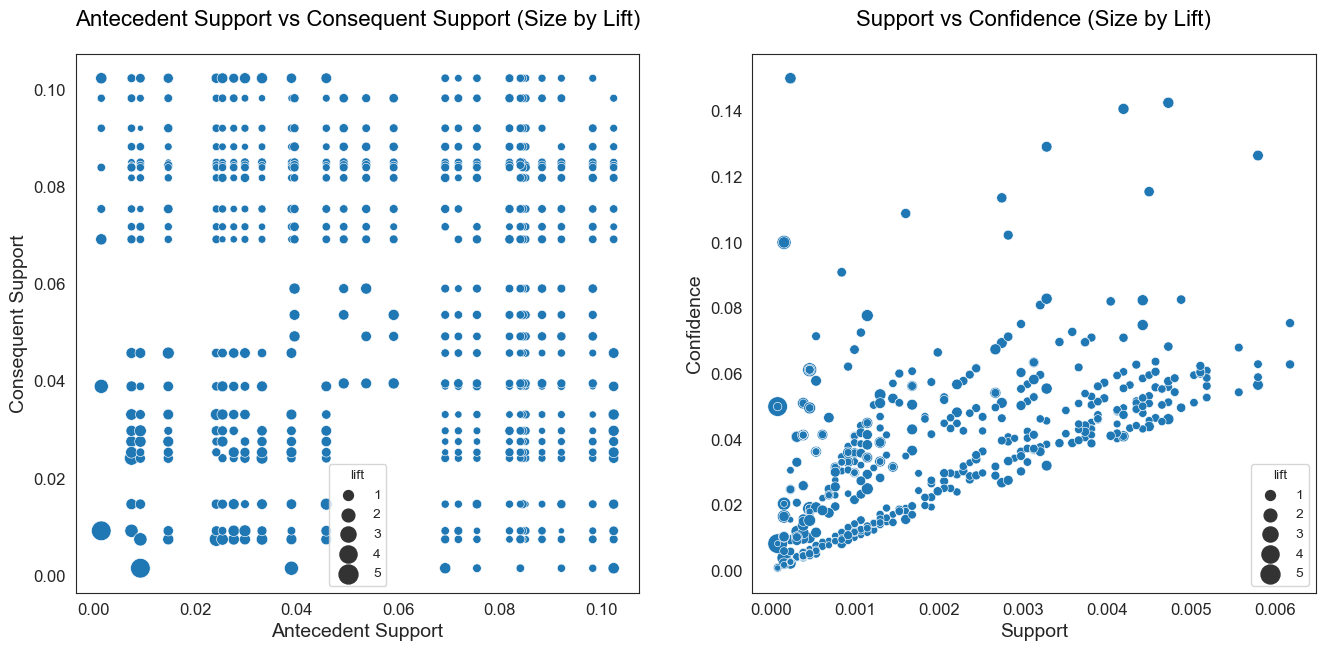

In [47]:
rules_scatterplot(rules_cat)

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Key Insights from the Plots:

1. **Strong Rules Concentrated in Low Antecedent/Consequent Support Areas:**

   - Most rules with high lift (e.g., lift > 3) are concentrated at very low antecedent and consequent support values (less than 0.05).

   - **Example:** The rule Suits & Sport Coats → Active (No. 86) has a lift = 0.858, but its antecedent support is 0.039 and consequent support is 0.071, indicating it is derived from a small number of customers.
   
   - These rules can be misleading as they do not represent general customer behavior.
   

2. **Low Confidence in High-Support Rules:**

   - Rules with high support (e.g., support > 0.03) tend to have low confidence (less than 0.1), indicating weak associations between products.

   - **Example:** The rule Accessories → Fashion Hoodies & Sweatshirts (No. 8) has a support of 0.0044 and confidence of 0.058, indicating a weak association.
   
   - Eliminating some low-support rules may also mean ignoring strong rules based on common metrics like confidence, as most high-confidence values occur at the lower bounds of antecedent and consequent support.
   

3. **Practical Recommendations for pruned:**

   - Focus on Rules with Balanced Antecedent and Consequent Support.
   
   - Ignore Rules with Very Low Antecedent or Consequent Support.


4. **Conclusion:**

   - Focusing on rules with reasonable antecedent and consequent support and moderate association (lift between 1 and 2) will provide more reliable recommendations, while rules with extreme values (very high lift with low antecedent or consequent support) should be treated with caution. 
   
   - Using these insights will help design a smarter and more responsive e-commerce store tailored to actual customer behavior.

<br>

- **We will initially filter the association rules to identify the most closely related category patterns by retaining rules that meet the following criteria:**

  1. Lift ≥ 1.3.

  2. zhangs_metric ≥ 0.

In [48]:
pruned_rules_cat = rules_cat[(rules_cat['lift'] >= 1.3) & (rules_cat['zhangs_metric'] >= 0)].reset_index(drop=True)

pruned_rules_cat

antecedents          consequents  antecedent support  \
0   Jumpsuits & Rompers    Blazers & Jackets            0.007472   
1     Blazers & Jackets  Jumpsuits & Rompers            0.024171   
2     Blazers & Jackets                 Plus            0.024171   
3                  Plus    Blazers & Jackets            0.033168   
4         Clothing Sets            Intimates            0.001525   
5             Intimates        Clothing Sets            0.102402   
6             Maternity        Clothing Sets            0.038963   
7         Clothing Sets            Maternity            0.001525   
8     Outerwear & Coats        Clothing Sets            0.069234   
9         Clothing Sets    Outerwear & Coats            0.001525   
10        Clothing Sets                Suits            0.001525   
11                Suits        Clothing Sets            0.009226   
12  Jumpsuits & Rompers              Dresses            0.007472   
13              Dresses  Jumpsuits & Rompers            0.045825   
14              Dresses               Skirts            0.045825   
15               Skirts              Dresses            0.014716   
16            Intimates                 Plus            0.102402   
17                 Plus            Intimates            0.033168   
18            Intimates      Socks & Hosiery            0.102402   
19      Socks & Hosiery            Intimates            0.029813   
20  Jumpsuits & Rompers             Leggings            0.007472   
21             Leggings  Jumpsuits & Rompers            0.027602   
22  Jumpsuits & Rompers            Maternity            0.007472   
23            Maternity  Jumpsuits & Rompers            0.038963   
24  Jumpsuits & Rompers       Pants & Capris            0.007472   
25       Pants & Capris  Jumpsuits & Rompers            0.025391   
26  Jumpsuits & Rompers                 Plus            0.007472   
27                 Plus  Jumpsuits & Rompers            0.033168   
28  Jumpsuits & Rompers               Skirts            0.007472   
29               Skirts  Jumpsuits & Rompers            0.014716   
30  Jumpsuits & Rompers      Socks & Hosiery            0.007472   
31      Socks & Hosiery  Jumpsuits & Rompers            0.029813   
32  Jumpsuits & Rompers                Suits            0.007472   
33                Suits  Jumpsuits & Rompers            0.009226   
34       Pants & Capris             Leggings            0.025391   
35             Leggings       Pants & Capris            0.027602   
36             Leggings               Skirts            0.027602   
37               Skirts             Leggings            0.014716   
38             Leggings                Suits            0.027602   
39                Suits             Leggings            0.009226   
40       Pants & Capris            Maternity            0.025391   
41            Maternity       Pants & Capris            0.038963   
42            Underwear                Pants            0.059093   
43                Pants            Underwear            0.053679   
44       Pants & Capris                 Plus            0.025391   
45                 Plus       Pants & Capris            0.033168   
46  Suits & Sport Coats                Socks            0.039573   
47                Socks  Suits & Sport Coats            0.049257   
48                Suits      Socks & Hosiery            0.009226   
49      Socks & Hosiery                Suits            0.029813   
50  Suits & Sport Coats            Underwear            0.039573   
51            Underwear  Suits & Sport Coats            0.059093   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.024171  0.000457    0.061224  2.532994  0.000277    1.039470   
1             0.007472  0.000457    0.018927  2.532994  0.000277    1.011676   
2             0.033168  0.001296    0.053628  1.616846  0.000495    1.021619   
3             0.024171  0.001296    0.039080  1.616846  0.000495    1.015516   
4      

&#9865; **There are many duplicate association rules, so we will remove these duplicate associations based on the smallest confidence value to keep the strongest association rule.**

<br>

### Now, to analyze the binary categories without repetition:

- **Create a column to avoid duplication between antecedents and consequents.**

In [49]:
pruned_rules_cat['sorted_categories'] = pruned_rules_cat.apply(
    lambda row: tuple(sorted([row['antecedents'], row['consequents']])), axis=1)

pruned_rules_cat.head()

antecedents          consequents  antecedent support  \
0  Jumpsuits & Rompers    Blazers & Jackets            0.007472   
1    Blazers & Jackets  Jumpsuits & Rompers            0.024171   
2    Blazers & Jackets                 Plus            0.024171   
3                 Plus    Blazers & Jackets            0.033168   
4        Clothing Sets            Intimates            0.001525   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.024171  0.000457    0.061224  2.532994  0.000277    1.039470   
1            0.007472  0.000457    0.018927  2.532994  0.000277    1.011676   
2            0.033168  0.001296    0.053628  1.616846  0.000495    1.021619   
3            0.024171  0.001296    0.039080  1.616846  0.000495    1.015516   
4            0.102402  0.000229    0.150000  1.464818  0.000073    1.055998   

   zhangs_metric                         sorted_categories  
0       0.609767  (Blazers & Jackets, Jumpsuits & Rompers)  
1       0.620201  (Blazers & Jackets, Jumpsuits & Rompers)  
2       0.390962                 (Blazers & Jackets, Plus)  
3       0.394600                 (Blazers & Jackets, Plus)  
4       0.317806                (Clothing Sets, Intimates)

<br>

- **Choose the best rule for each precedent based on confidence.**

In [50]:
rules_cat_unique = pruned_rules_cat.sort_values(
    by='confidence', ascending=False)

rules_cat_unique

antecedents          consequents  antecedent support  \
4         Clothing Sets            Intimates            0.001525   
17                 Plus            Intimates            0.033168   
19      Socks & Hosiery            Intimates            0.029813   
7         Clothing Sets            Maternity            0.001525   
9         Clothing Sets    Outerwear & Coats            0.001525   
50  Suits & Sport Coats            Underwear            0.039573   
43                Pants            Underwear            0.053679   
15               Skirts              Dresses            0.014716   
42            Underwear                Pants            0.059093   
46  Suits & Sport Coats                Socks            0.039573   
0   Jumpsuits & Rompers    Blazers & Jackets            0.007472   
12  Jumpsuits & Rompers              Dresses            0.007472   
51            Underwear  Suits & Sport Coats            0.059093   
47                Socks  Suits & Sport Coats            0.049257   
2     Blazers & Jackets                 Plus            0.024171   
40       Pants & Capris            Maternity            0.025391   
26  Jumpsuits & Rompers                 Plus            0.007472   
22  Jumpsuits & Rompers            Maternity            0.007472   
10        Clothing Sets                Suits            0.001525   
48                Suits      Socks & Hosiery            0.009226   
16            Intimates                 Plus            0.102402   
44       Pants & Capris                 Plus            0.025391   
39                Suits             Leggings            0.009226   
18            Intimates      Socks & Hosiery            0.102402   
20  Jumpsuits & Rompers             Leggings            0.007472   
30  Jumpsuits & Rompers      Socks & Hosiery            0.007472   
24  Jumpsuits & Rompers       Pants & Capris            0.007472   
3                  Plus    Blazers & Jackets            0.033168   
37               Skirts             Leggings            0.014716   
34       Pants & Capris             Leggings            0.025391   
45                 Plus       Pants & Capris            0.033168   
41            Maternity       Pants & Capris            0.038963   
35             Leggings       Pants & Capris            0.027602   
14              Dresses               Skirts            0.045825   
32  Jumpsuits & Rompers                Suits            0.007472   
28  Jumpsuits & Rompers               Skirts            0.007472   
36             Leggings               Skirts            0.027602   
1     Blazers & Jackets  Jumpsuits & Rompers            0.024171   
33                Suits  Jumpsuits & Rompers            0.009226   
49      Socks & Hosiery                Suits            0.029813   
38             Leggings                Suits            0.027602   
25       Pants & Capris  Jumpsuits & Rompers            0.025391   
27                 Plus  Jumpsuits & Rompers            0.033168   
21             Leggings  Jumpsuits & Rompers            0.027602   
29               Skirts  Jumpsuits & Rompers            0.014716   
31      Socks & Hosiery  Jumpsuits & Rompers            0.029813   
13              Dresses  Jumpsuits & Rompers            0.045825   
23            Maternity  Jumpsuits & Rompers            0.038963   
11                Suits        Clothing Sets            0.009226   
6             Maternity        Clothing Sets            0.038963   
5             Intimates        Clothing Sets            0.102402   
8     Outerwear & Coats        Clothing Sets            0.069234   

    consequent support   support  confidence      lift  leverage  conviction  \
4             0.102402  0.000229    0.150000  1.464818  0.000073    1.055998   
17            0.102402  0.004727    0.142529  1.391857  0.001331    1.046797   
19            0.102402  0.004194    0.140665  1.373657  0.001141    1.044526   
7             0.038963  0.000152    0.100000  2.566536  0.000093    1.067819   
9      

<br>

- **Delete duplicates based on smaller confidence values.**

In [51]:
best_rules_per_category = rules_cat_unique.drop_duplicates(
    subset=['sorted_categories'], keep='first').reset_index(drop=True)


<br>

- **Drop the helper column for sorted categories.**

In [52]:
best_rules_per_category = best_rules_per_category.drop(columns=['sorted_categories'])

best_rules_per_category.head()

antecedents        consequents  antecedent support  consequent support  \
0    Clothing Sets          Intimates            0.001525            0.102402   
1             Plus          Intimates            0.033168            0.102402   
2  Socks & Hosiery          Intimates            0.029813            0.102402   
3    Clothing Sets          Maternity            0.001525            0.038963   
4    Clothing Sets  Outerwear & Coats            0.001525            0.069234   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.000229    0.150000  1.464818  0.000073    1.055998       0.317806  
1  0.004727    0.142529  1.391857  0.001331    1.046797       0.291194  
2  0.004194    0.140665  1.373657  0.001141    1.044526       0.280375  
3  0.000152    0.100000  2.566536  0.000093    1.067819       0.611302  
4  0.000152    0.100000  1.444383  0.000047    1.034185       0.308133

In [53]:
best_rules_per_category.sort_values(by="antecedents")

antecedents        consequents  antecedent support  \
11    Blazers & Jackets               Plus            0.024171   
0         Clothing Sets          Intimates            0.001525   
3         Clothing Sets          Maternity            0.001525   
4         Clothing Sets  Outerwear & Coats            0.001525   
15        Clothing Sets              Suits            0.001525   
21  Jumpsuits & Rompers     Pants & Capris            0.007472   
20  Jumpsuits & Rompers    Socks & Hosiery            0.007472   
19  Jumpsuits & Rompers           Leggings            0.007472   
14  Jumpsuits & Rompers          Maternity            0.007472   
13  Jumpsuits & Rompers               Plus            0.007472   
24  Jumpsuits & Rompers              Suits            0.007472   
25  Jumpsuits & Rompers             Skirts            0.007472   
9   Jumpsuits & Rompers  Blazers & Jackets            0.007472   
10  Jumpsuits & Rompers            Dresses            0.007472   
6                 Pants          Underwear            0.053679   
17       Pants & Capris               Plus            0.025391   
23       Pants & Capris           Leggings            0.025391   
12       Pants & Capris          Maternity            0.025391   
1                  Plus          Intimates            0.033168   
7                Skirts            Dresses            0.014716   
22               Skirts           Leggings            0.014716   
2       Socks & Hosiery          Intimates            0.029813   
16                Suits    Socks & Hosiery            0.009226   
18                Suits           Leggings            0.009226   
8   Suits & Sport Coats              Socks            0.039573   
5   Suits & Sport Coats          Underwear            0.039573   

    consequent support   support  confidence      lift  leverage  conviction  \
11            0.033168  0.001296    0.053628  1.616846  0.000495    1.021619   
0             0.102402  0.000229    0.150000  1.464818  0.000073    1.055998   
3             0.038963  0.000152    0.100000  2.566536  0.000093    1.067819   
4             0.069234  0.000152    0.100000  1.444383  0.000047    1.034185   
15            0.009226  0.000076    0.050000  5.419421  0.000062    1.042920   
21            0.025391  0.000305    0.040816  1.607526  0.000115    1.016082   
20            0.029813  0.000305    0.040816  1.369069  0.000082    1.011471   
19            0.027602  0.000305    0.040816  1.478746  0.000099    1.013777   
14            0.038963  0.000381    0.051020  1.309457  0.000090    1.012706   
13            0.033168  0.000381    0.051020  1.538236  0.000133    1.018812   
24            0.009226  0.000152    0.020408  2.212009  0.000084    1.011415   
25            0.014716  0.000152    0.020408  1.386803  0.000043    1.005811   
9             0.024171  0.000457    0.061224  2.532994  0.000277    1.039470   
10            0.045825  0.000457    0.061224  1.336039  0.000115    1.016403   
6             0.059093  0.004422    0.082386  1.394190  0.001250    1.025385   
17            0.033168  0.001144    0.045045  1.358082  0.000302    1.012437   
23            0.027602  0.000915    0.036036  1.305560  0.000214    1.008749   
12            0.038963  0.001296    0.051051  1.310244  0.000307    1.012738   
1             0.102402  0.004727    0.142529  1.391857  0.001331    1.046797   
7             0.045825  0.001144    0.077720  1.696008  0.000469    1.034583   
22            0.027602  0.000534    0.036269  1.314015  0.000128    1.008994   
2             0.102402  0.004194    0.140665  1.373657  0.001141    1.044526   
16            0.029813  0.000457    0.049587  1.663250  0.000182    1.020805   
18            0.027602  0.000381    0.041322  1.497078  0.000127    1.014312   
8             0.049257  0.002669    0.067437  1.369104  0.000719    1.019496   
5             0.059093  0.003279    0.082852  1.402064  0.000940    1.025905   

    zhangs_metric  
11       0.390962  
0        0.317806  
3       

<br>

- **Convert the data frame into a pivot table based on the confidence values, to display them in a heat map chart.**

In [54]:
rule_cat_pivot = best_rules_per_category.pivot(index = "consequents", columns= "antecedents", values= "confidence")

<br>

- **Create a "rule" column to uniquely identify each association rule, And extract relevant columns for parallel visualization**

In [55]:
best_rules_per_category["rule"] = best_rules_per_category.index
coord = best_rules_per_category[["antecedents", "consequents", "rule"]]

<br>

- **Apply "parallel_coordinates" and "heatmap" to visualizes product association rules.**

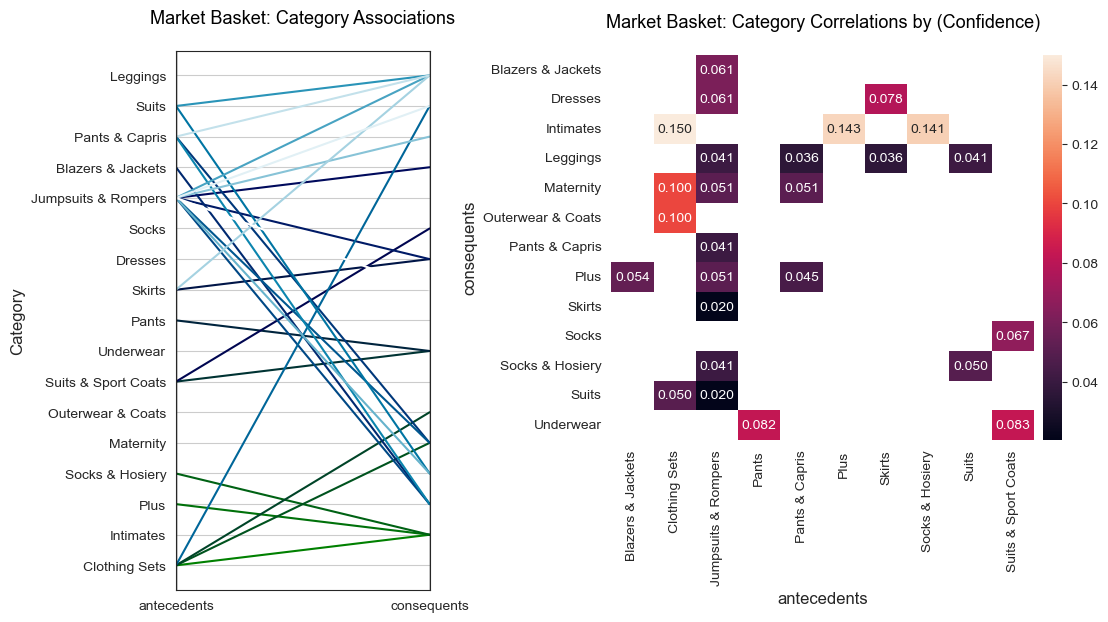

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


parallel_coordinates(coord, 'rule', colormap= "ocean", ax=axes[0])

box = axes[0].get_position() # Get current position
axes[0].set_position([box.x0, box.y0 - 0.3, box.width * 0.6, box.height * 1.4])
axes[0].set_title(f'Market Basket: Category Associations', fontsize=13, color="k", pad=20)
axes[0].set_ylabel("Category", fontsize=12)
axes[0].legend([], frameon=False)


sns.heatmap(rule_cat_pivot, annot=True, fmt=".3f", ax=axes[1])

box2 = axes[1].get_position() # Get current position
axes[1].set_position([box2.x0 - 0.06 , box.y0, box2.width * 1.25, box2.height * 1])
axes[1].set_title(f'Market Basket: Category Correlations by (Confidence)', fontsize=13, color="k", pad=20)
axes[1].set_xlabel("antecedents",fontsize=12)
axes[1].set_ylabel("consequents",fontsize=12);

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Key Insights and Recommendations for Strategic Category Placement in the Store:

1. **Strong Positive Correlations:**

   - **Intimates & Clothing Sets:**

     - **Insight:** Customers who buy "Clothing Sets" are highly likely to buy "Intimates".

     - **Recommendation:** Place "Intimates" near "Clothing Sets" to encourage cross-purchasing.
     <br>

    - **Outerwear & Clothing Sets:**

      - **Insight:** "Outerwear" and "Clothing Sets" are strongly connected.

      - **Recommendation:** Position "Outerwear" and "Clothing Sets" in adjacent sections, especially during seasonal campaigns.
      <br>

    - **Suits & Plus Categories:**

      - **Insight:** Customers in the "Plus" category often purchase "Suits".

      - **Recommendation:** Place "Suits" near the "Plus" category to create a seamless shopping experience for plus-size customers.
      <br>

     - **Jumpsuits & Sleep & Lounge:**

       - **Insight:** "Jumpsuits" and "Sleep & Lounge" items are often purchased together.

       - **Recommendation:** Create a dedicated "Comfort Zone" section where "Jumpsuits" and "Sleep & Lounge" items are displayed together.
       <br>
       <br>



2. **Interesting Category Relationships:**

   - **Active Wear:**

     - **Maternity:** Moderate positive correlation.

     - **Recommendation:** Place "Maternity" activewear near general "Active Wear" to target pregnant athletes.
     <br>

     - **Leggings:** Moderate positive correlation.

     - **Recommendation:** Position "Leggings" close to "Active Wear" to highlight their versatility.
     <br>

     - **Socks & Hosiery:** Strong positive correlation.

     - **Recommendation:** Display "Socks & Hosiery" near "Active Wear" to encourage add-on purchases.
     <br>

   - **Jeans:**

     - **Accessories:** Positive correlation.

     - **Recommendation:** Place "Accessories" like belts and scarves near "Jeans" to suggest complementary items.
     <br>

     - **Intimates:** Positive correlation.

     - **Recommendation:** Position "Intimates" near "Jeans" to promote bundled purchases.
     <br>

     - **Socks:** Positive correlation.

     - **Recommendation:** Display "Socks" near "Jeans" to encourage customers to complete their outfits.
     <br>
     <br>
     

3. **Strategic Category Placement:**

   - **Intimates & Clothing Sets:**

     - Place "Intimates" directly behind or beside "Clothing Sets" to create a natural flow for customers.
     <br>
     <br>
     
   - **Outerwear & Clothing Sets:**

     - Position "Outerwear" adjacent to "Clothing Sets" to encourage customers to purchase both categories together.
     <br>
     <br>

   - **Suits & Plus Categories:**

     - Create a dedicated "Plus Suits" section within the "Plus" category to make it easier for customers to find matching items.
     <br>
     <br>

   - **Jumpsuits & Sleep & Lounge:**

     - Design a "Comfort Zone" where "Jumpsuits" and "Sleep & Lounge" items are displayed together, emphasizing comfort and style.
     <br>
     <br>

   - **Active Wear & Related Categories:**

     - Place "Maternity", "Leggings", and "Socks & Hosiery" near "Active Wear" to create a one-stop shop for fitness and casual wear.
     <br>
     <br>

   - **Jeans & Complementary Items:**

     - Position "Accessories", "Intimates", and "Socks" near "Jeans" to encourage customers to purchase complete outfits.
     <br>
     <br>
     <br>
     

4. **Avoid Negative Overlaps:**

   - **Jumpsuits & Rompers vs. Dresses/Skirts:**

     - Avoid placing "Jumpsuits & Rompers" near "Dresses" or "Skirts" to prevent customer confusion and competition between categories.
     <br>
     <br>

   - **Blazers & Jackets vs. Active Wear:**

     - Separate "Blazers & Jackets" from "Active Wear" to maintain distinct brand identities and shopping experiences.
     <br>
     <br>

   - **Skirts vs. Jumpsuits & Rompers:**

     - Keep "Skirts" and "Jumpsuits & Rompers" in separate sections to highlight their unique appeal.
     <br>
     <br>
     <br>
     
     

- **Final Thoughts:**

  - By strategically placing categories with strong positive correlations near each other, you can enhance the shopping experience, encourage cross-purchasing, and increase overall sales. 
  
  - Avoid placing conflicting categories together to minimize competition and ensure a seamless shopping journey for your customers.

<a id="Concl"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>Conclusions & Insights</b></div>

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">

### Summary of Findings and Recommendations:

- This project analyzed DrapeAura's 2023 e-commerce data to promote less common products and redesign the store layout using Market Basket Analysis (MBA). 


- **Below are the key insights and actionable recommendations:**

1. **Promoting Less Common Products**
  
   - **High-Lift, Low-Support Rules:** Identified rare but strong associations (e.g., "Outerwear → Specialty Undergarments" and "Shapewear → Lingerie").

   - **Niche Opportunities:** These rules are ideal for targeted campaigns and seasonal promotions.

   - **Recommendations:**

     - Use bundled offers or limited-time deals to promote rare products.

     - Focus on high-margin, low-volume items like luxury lingerie or bridal wear.
     <br>


2. **Redesigning Store Layout**

   - **Strongly Correlated Categories:**

     - **Intimates & Clothing Sets:** Place these categories adjacently to encourage cross-purchasing.

     - **Outerwear & Clothing Sets:** Position them together, especially during seasonal campaigns.

     - **Suits & Plus Categories:** Create a dedicated "Plus Suits" section.

     - **Jumpsuits & Sleep & Lounge:** Design a "Comfort Zone" for these items.
     <br>
     
   - **Moderate Correlations:**

     - **Active Wear & Related Categories:** Place "Maternity," "Leggings," and "Socks & Hosiery" near "Active Wear."

     - **Jeans & Accessories:** Position "Accessories," "Intimates," and "Socks" near "Jeans" to encourage complete outfit purchases.
     
   - **Avoid Negative Overlaps:** Separate conflicting categories like "Jumpsuits & Rompers" and "Dresses."
   <br>


3. **Strategic Marketing**

   - **Hyper-Targeted Campaigns:** Use antecedent products for women (e.g., premium "Jackets") to promote rare consequents (e.g., specialized "Bras").

   - **Niche Marketing:** Leverage high-lift rules for premium or seasonal items.

   - **Personalized Recommendations:** Use association rules for bundled offers and cross-selling.
   <br>


- **Conclusion:**
<br>

  - By focusing on high-lift rules and strongly correlated categories, DrapeAura can increase sales of underperforming products, enhance customer experience, and optimize store layout. 

  - These insights provide a clear roadmap for achieving business growth and operational efficiency.

<a id="Tableau"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#404040;overflow:hidden"><b>View On Tableau</b></div>

<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f5f5f5; 
    border-radius: 10px;
">
    
### View the project's visualization summary on Tableau:

- https://public.tableau.com/app/profile/mohammed.elshennawy/viz/DrapeAura2023E-CommerceAnalysisMarketBasketAnalysisByAprioriAlgorithm/ProjectStory
